## Outlier View

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data_set = pd.read_csv('../data/2_DateSet_NotNormalized.gz', compression='gzip', date_format=["date"])
Data_set['date'] = pd.to_datetime(Data_set['date'])
Data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5346528 entries, 0 to 5346527
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   site_no               float64       
 1   site_desc             object        
 2   date                  datetime64[ns]
 3   hourly_traffic        float64       
 4   day_of_week           int64         
 5   holiday               float64       
 6   temperature_2m        float64       
 7   relative_humidity_2m  float64       
 8   apparent_temperature  float64       
 9   precipitation         float64       
 10  wind_speed_10m        float64       
 11  cloud_cover           float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 489.5+ MB


<Axes: xlabel='Column', ylabel='Normalized'>

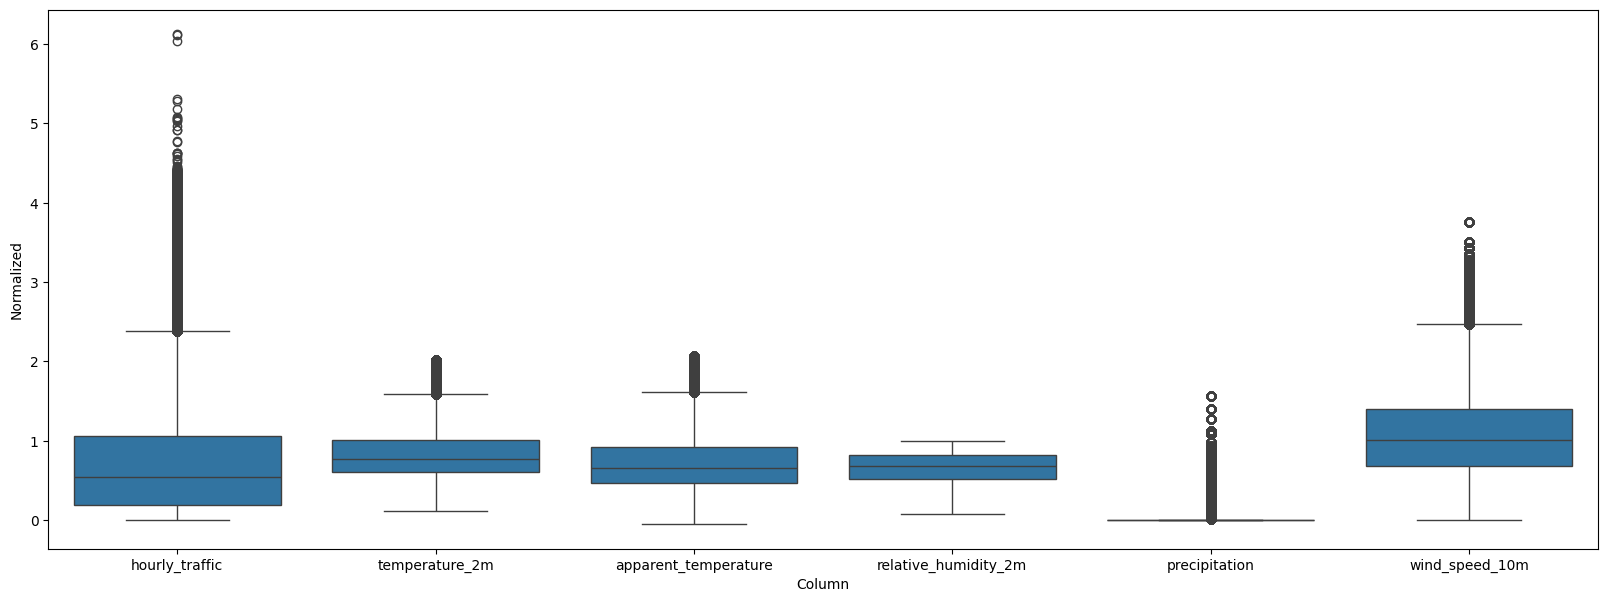

In [ ]:
plt.figure(figsize=(20, 7))

df_scaled = Data_set.iloc[:,4:10]
df_scaled = df_scaled.loc[df_scaled.hourly_traffic!=0].melt(var_name='Column', value_name='Normalized')
sns.boxplot(x='Column', y='Normalized', data=df_scaled)

We have outliers in hourly_traffic, are there corrupted data or is traffic really like that?

Outliers are data points that are *far outside the range* compared to most other data in a given set. They can significantly influence the results of machine learning models, causing inaccurate predictions and distorted data analysis.

Outliers can have a substantial impact on the performance of machine learning models. They can affect the accuracy of models and lead to erroneous predictions.

> Example, in a regression model, anomalous values can cause a significant deviation from the best fit line of the data, resulting in imprecise predictions.

Outliers can also influence the training of machine learning models. When outliers are present in the training set, the model can become excessively sensitive to these points, causing *overfitting*.

Methods we have seen to handle outliers:
- **Z-score Method**: The Z-score is calculated by subtracting the mean from each data point and dividing the result by the standard deviation. Any data point with a Z-score more significant than a specified threshold (usually 3 or -3) is considered an outlier.
- **Interquartile Range Method**: The IQR is the range between the first quartile of the data (25th percentile, The percentile is a measure used in statistics to indicate the minimum value below which a given percentage of observations falls) and the third quartile (75th percentile). Any data outside the 1.5 times IQR range is considered an outlier.

C:\Users\theag\AppData\Local\Temp\ipykernel_14128\972230360.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 3, figsize=(15,4))


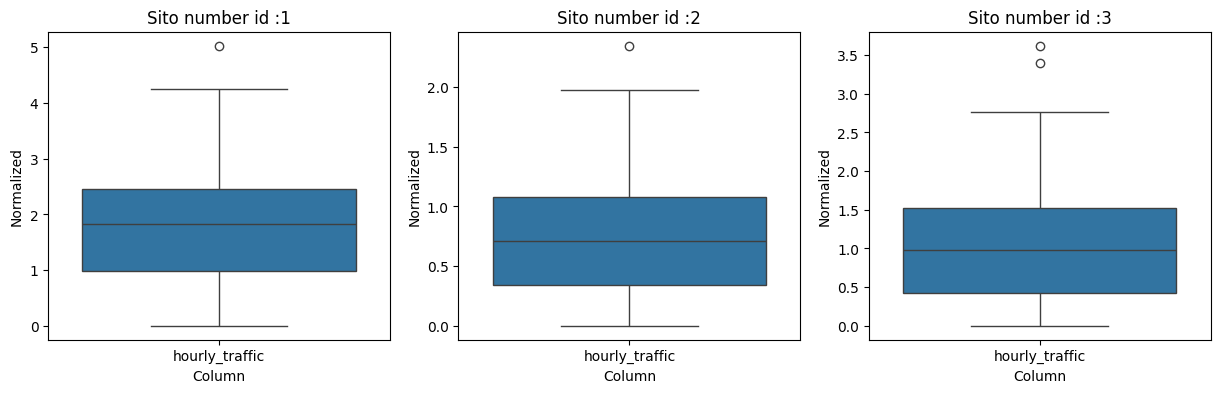

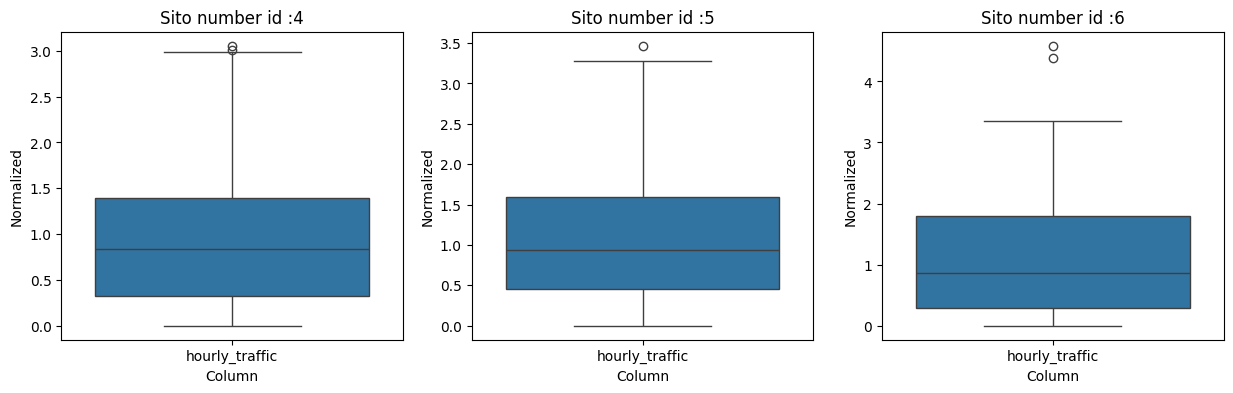

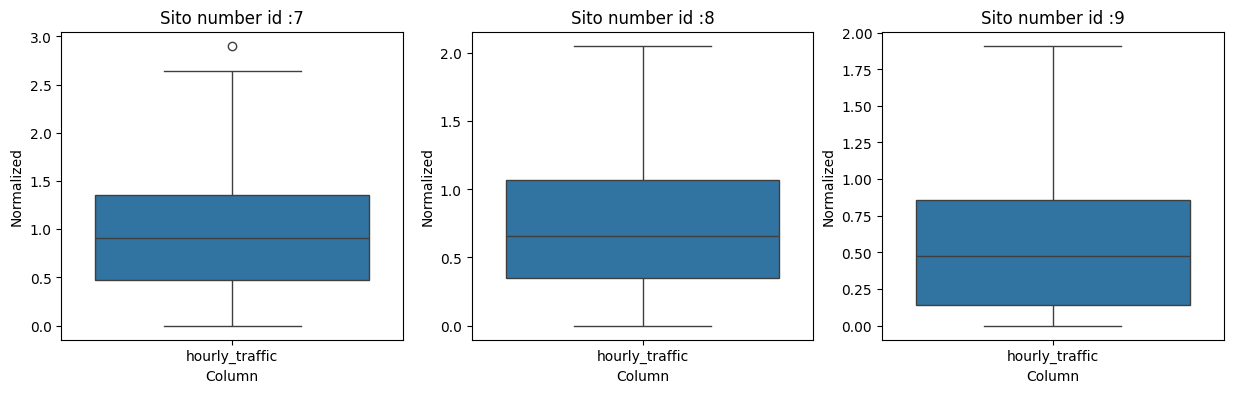

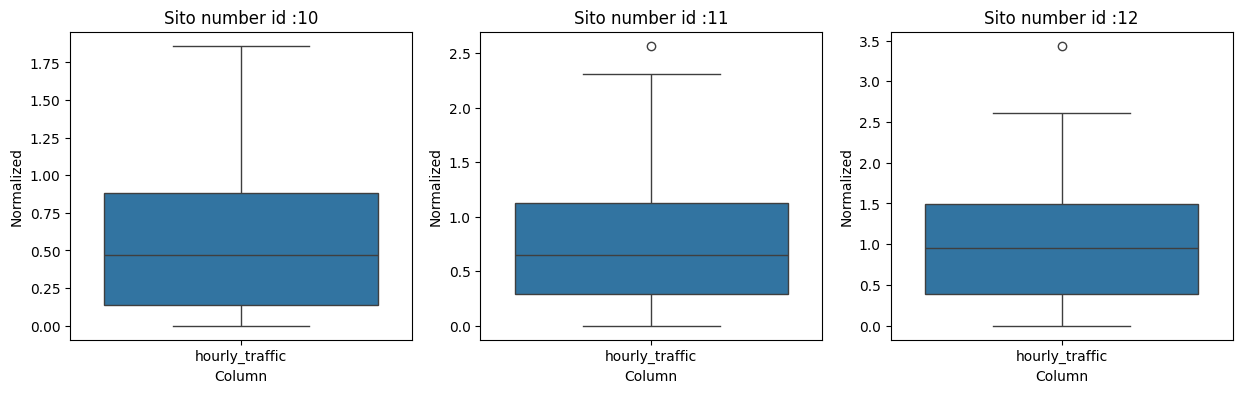

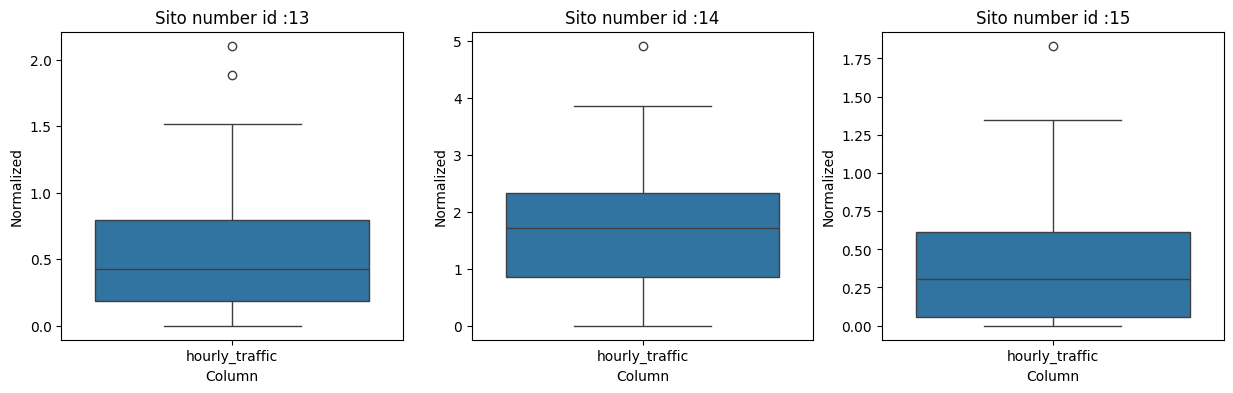

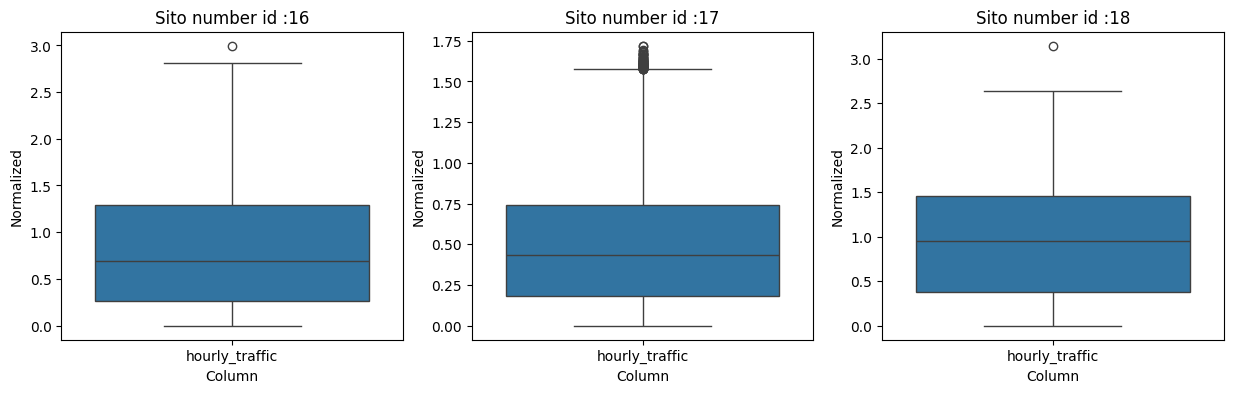

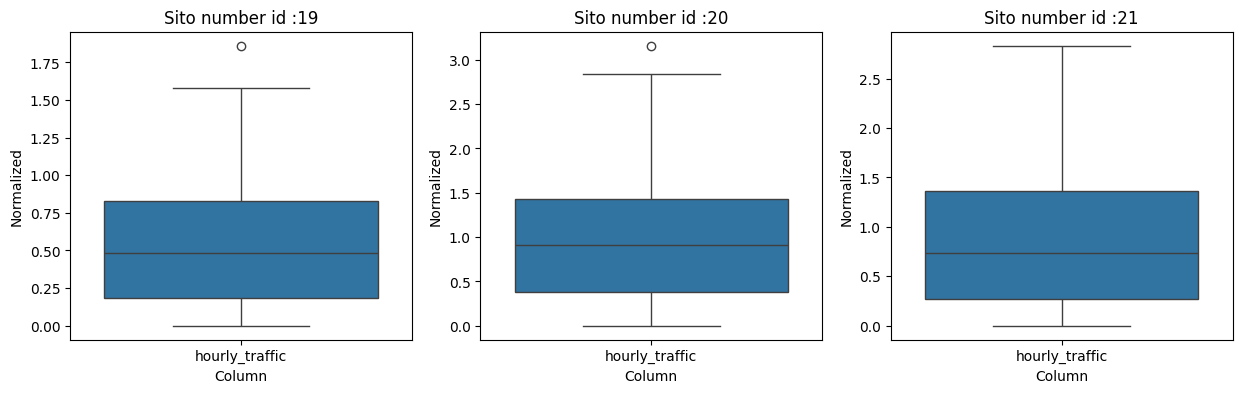

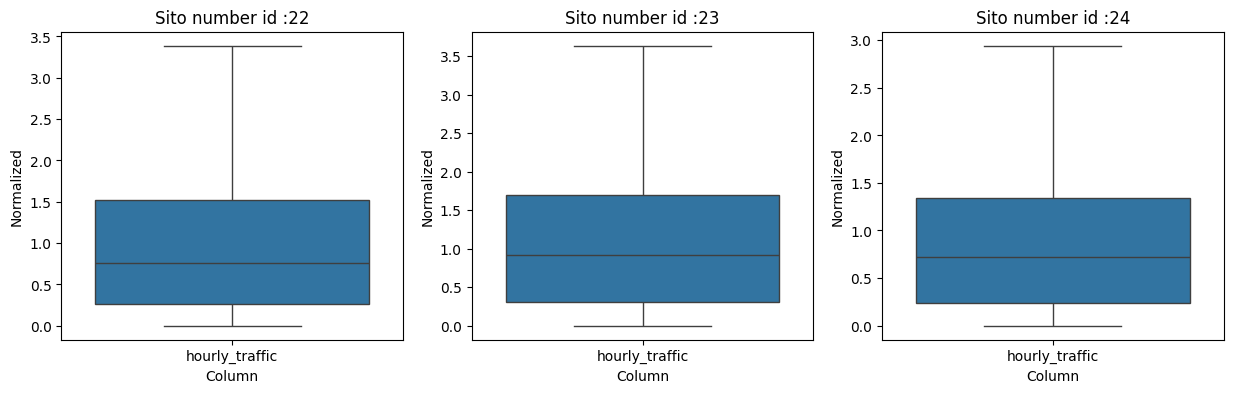

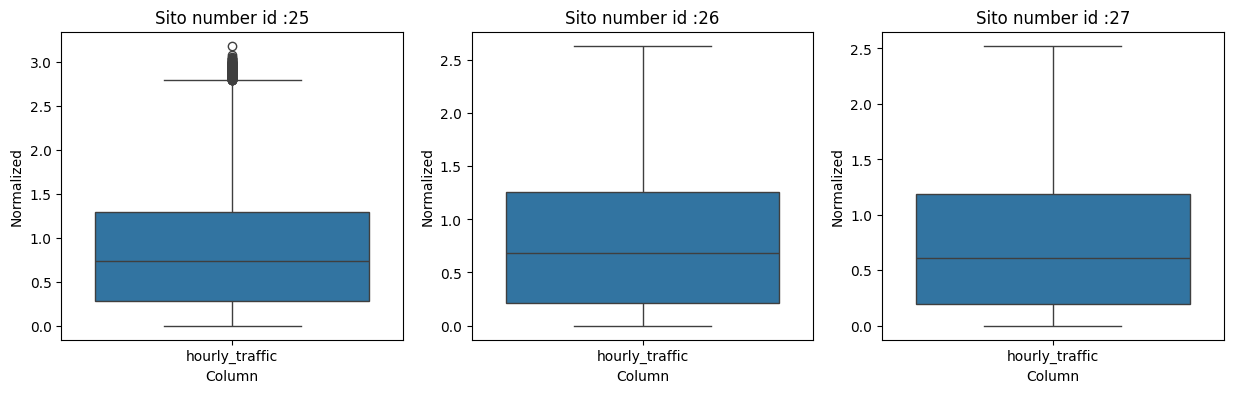

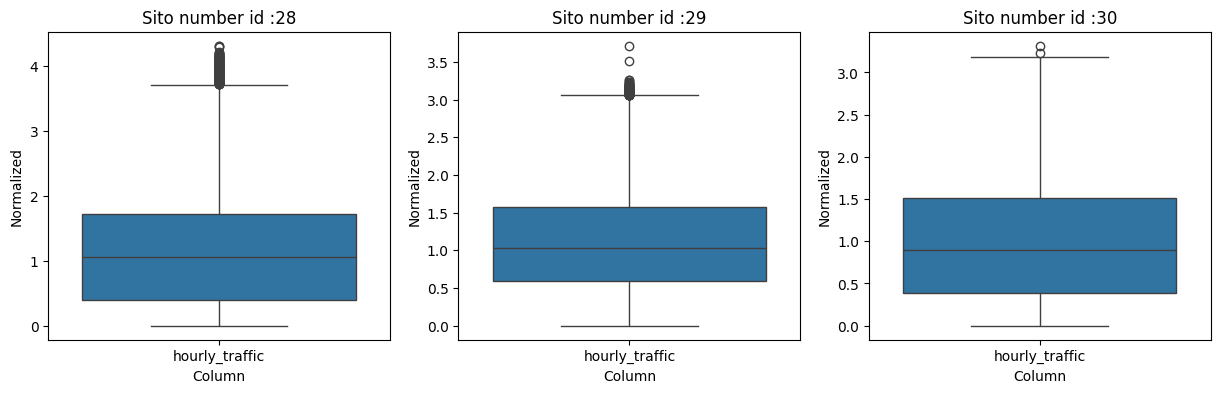

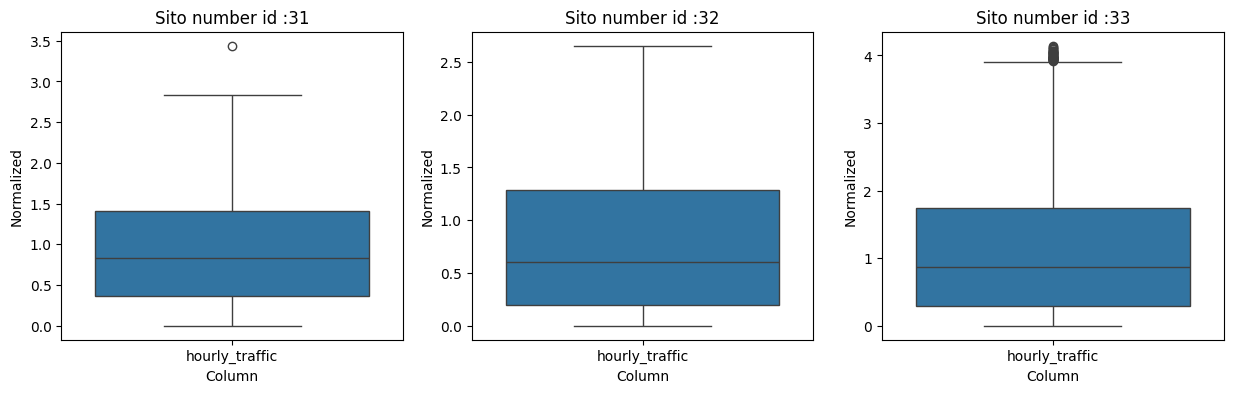

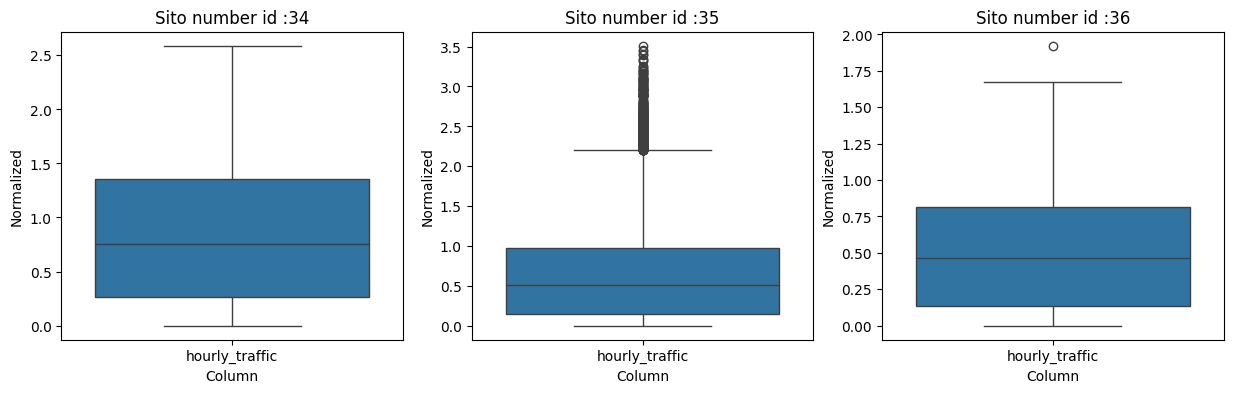

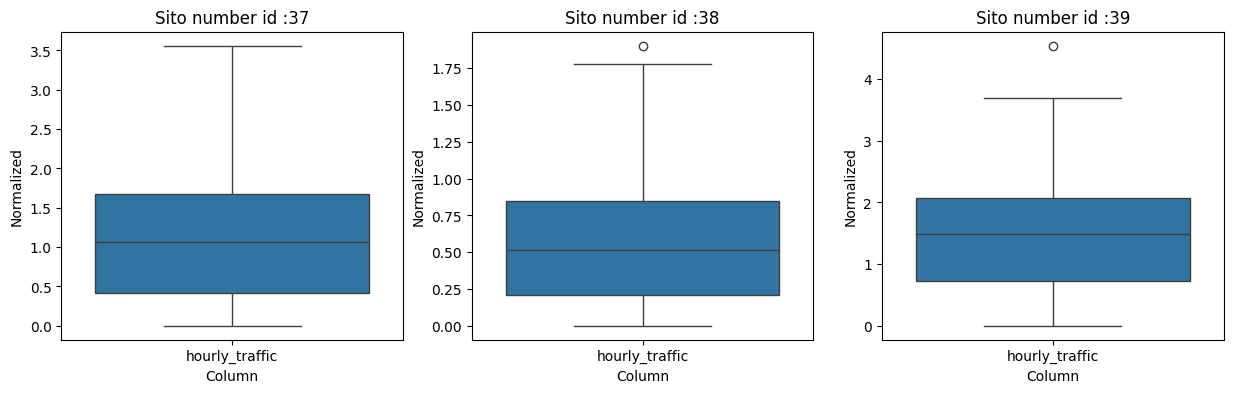

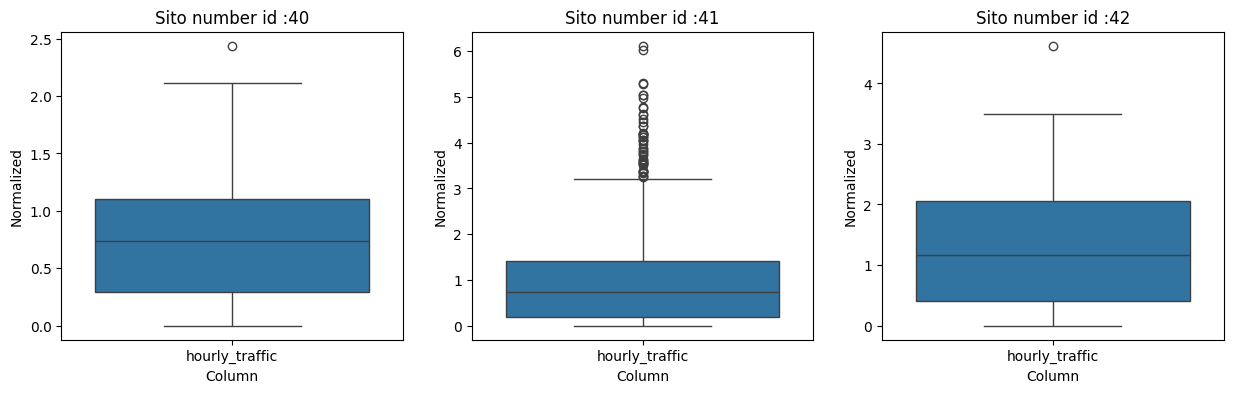

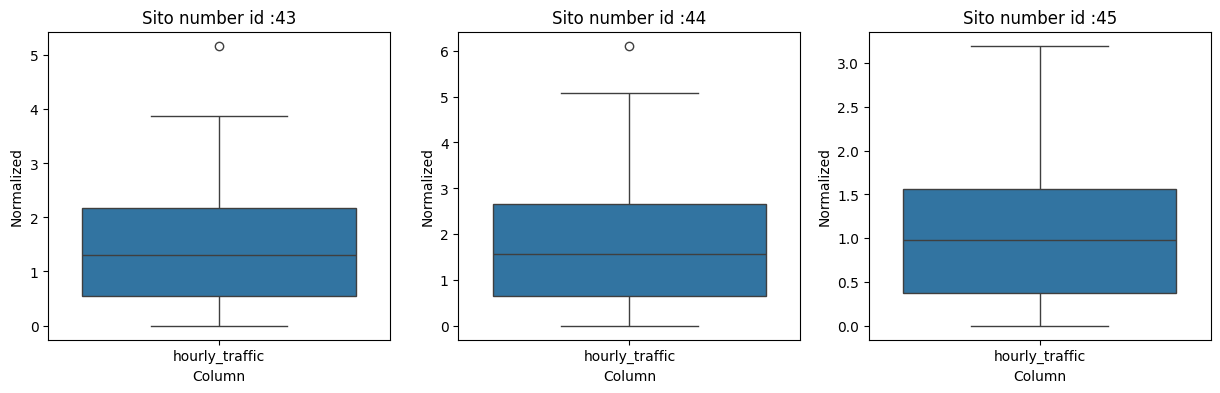

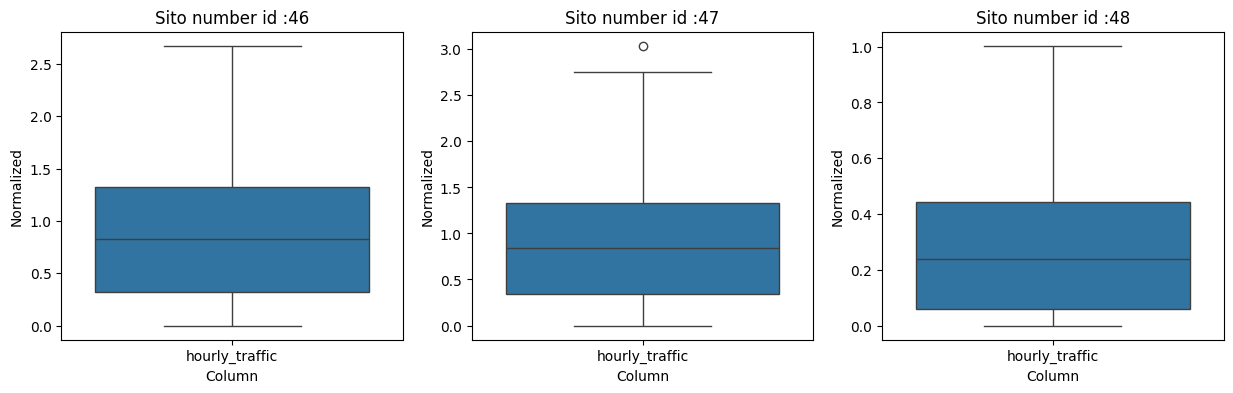

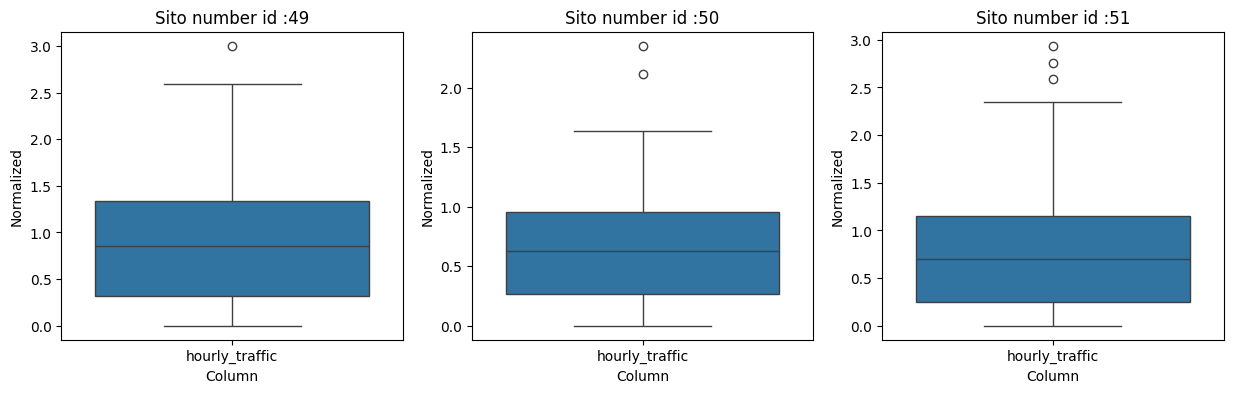

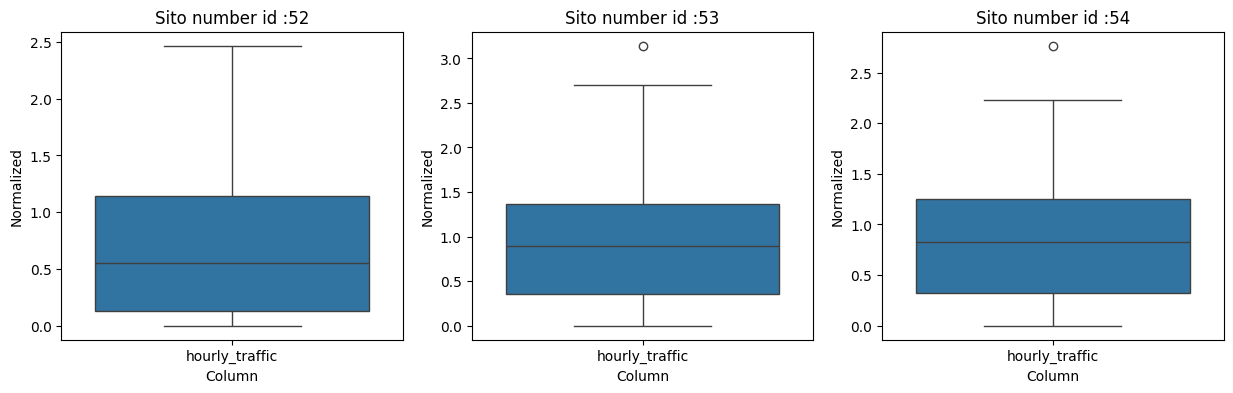

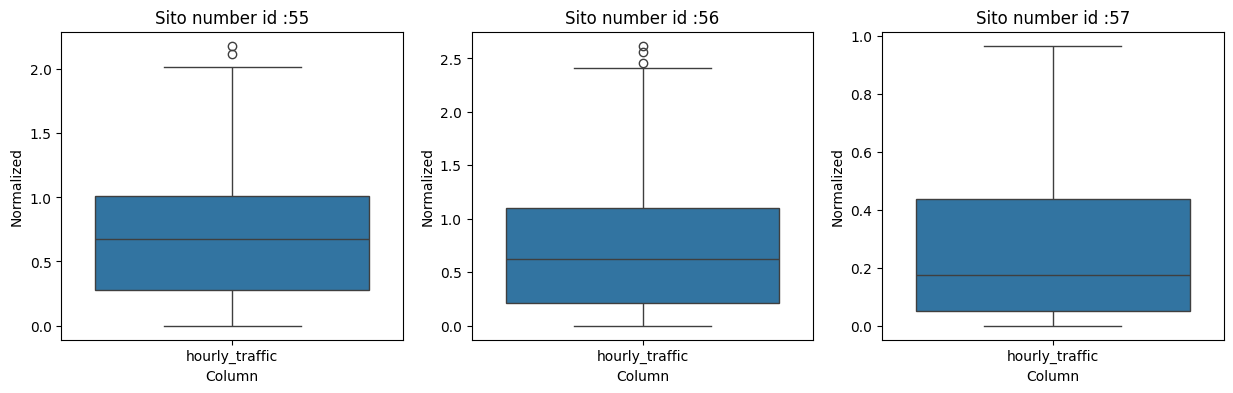

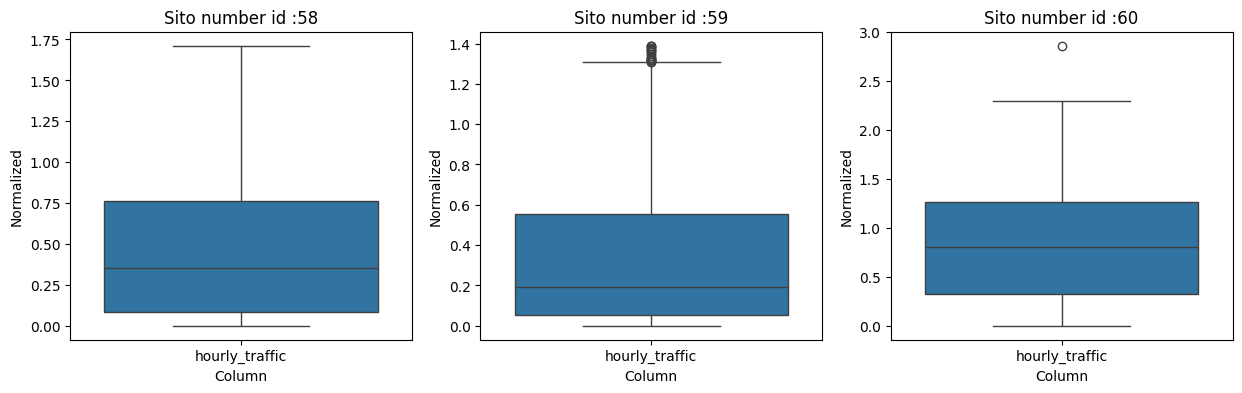

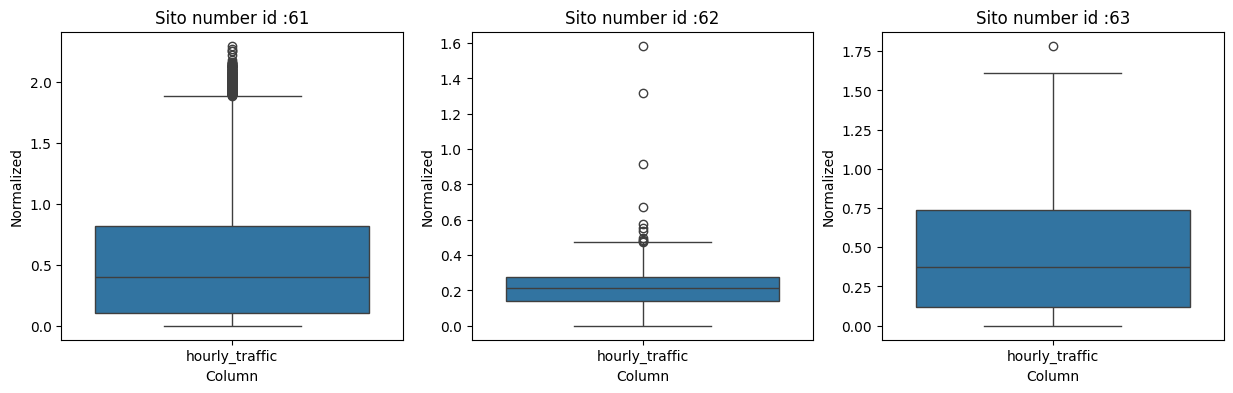

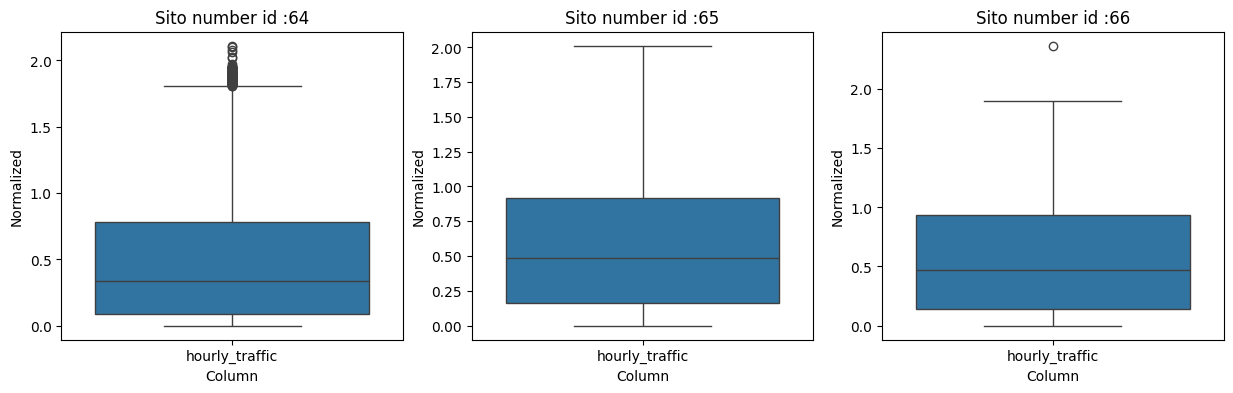

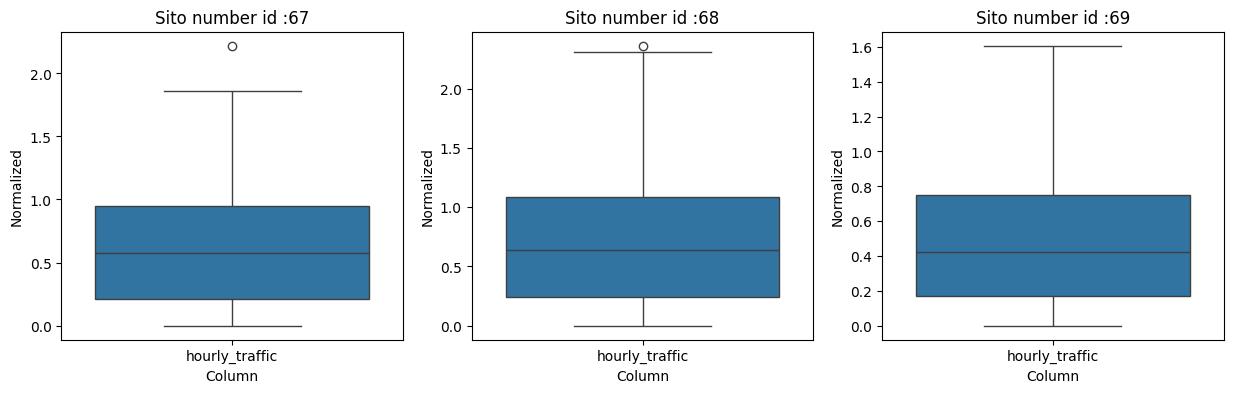

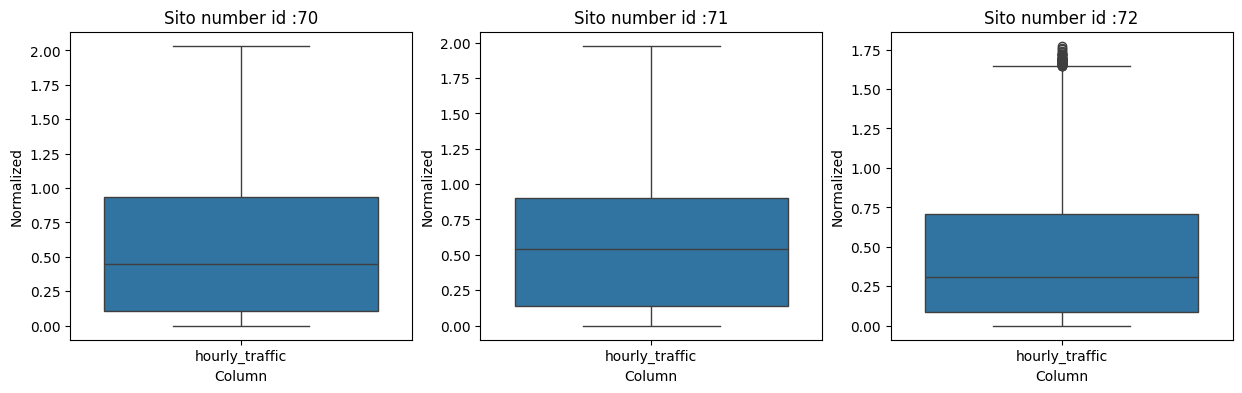

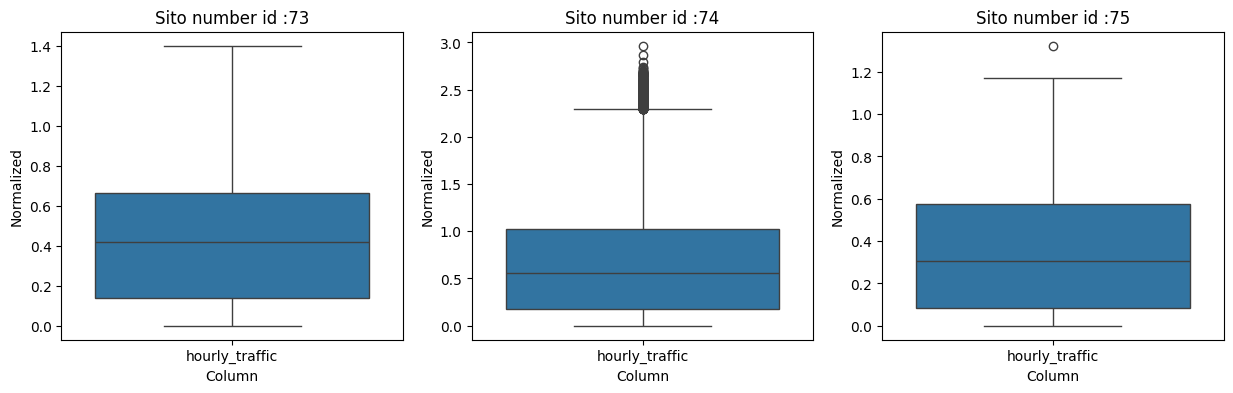

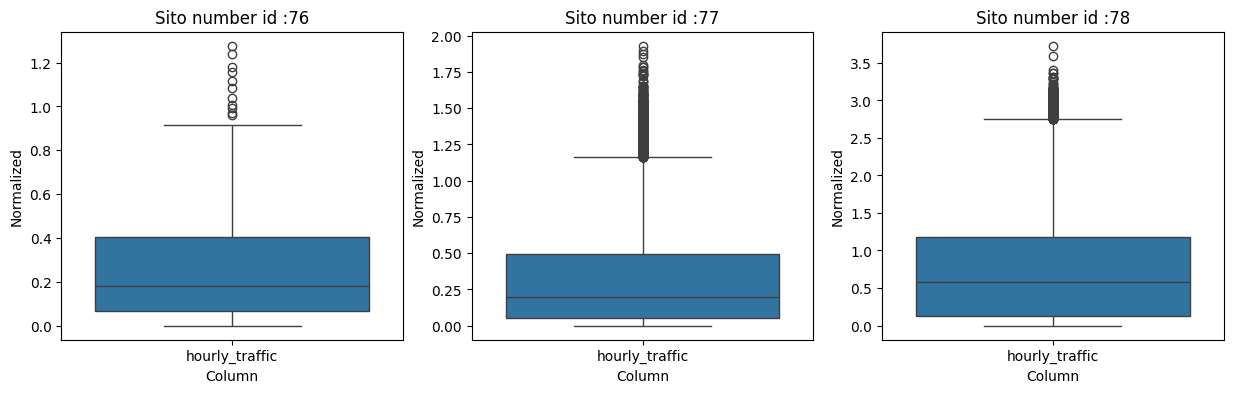

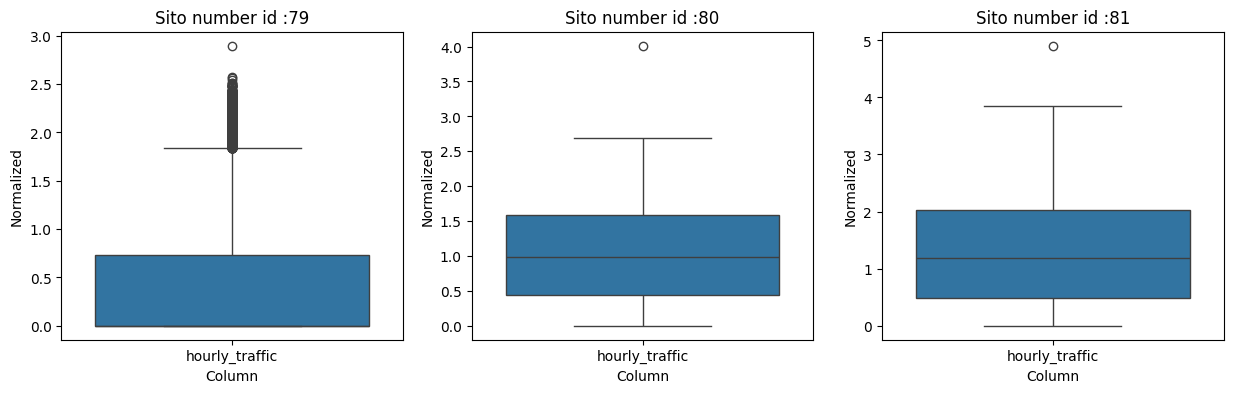

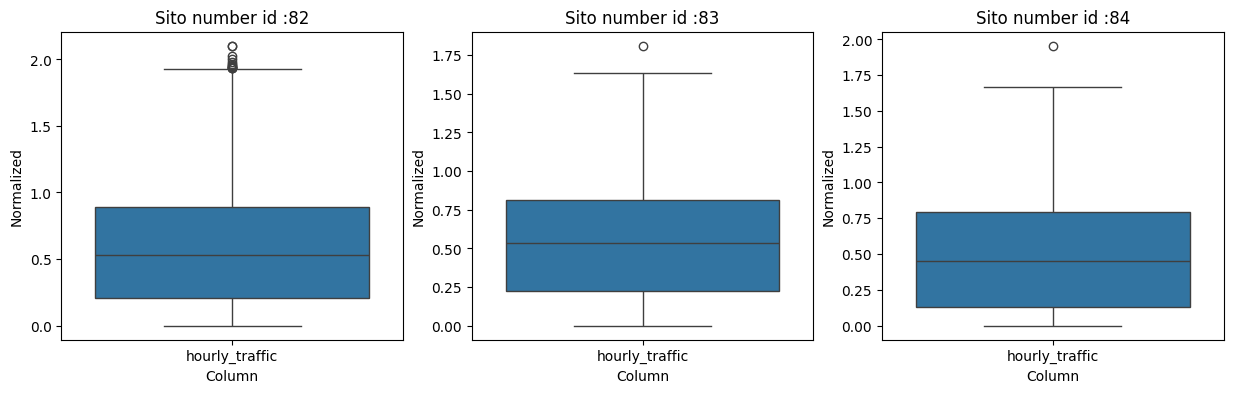

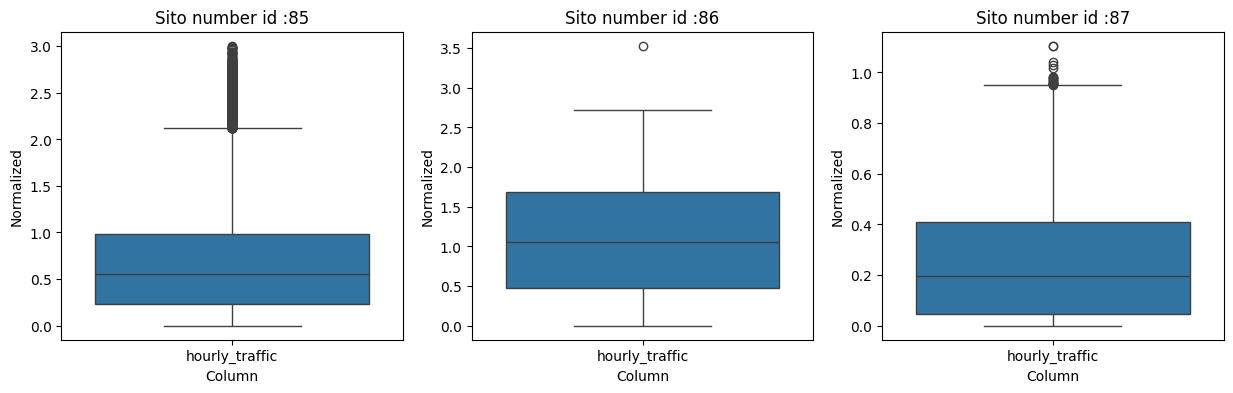

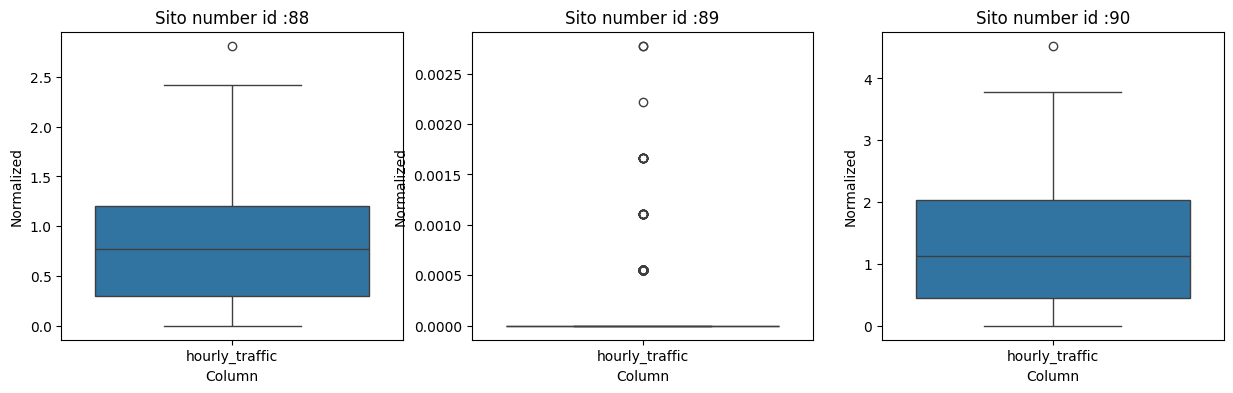

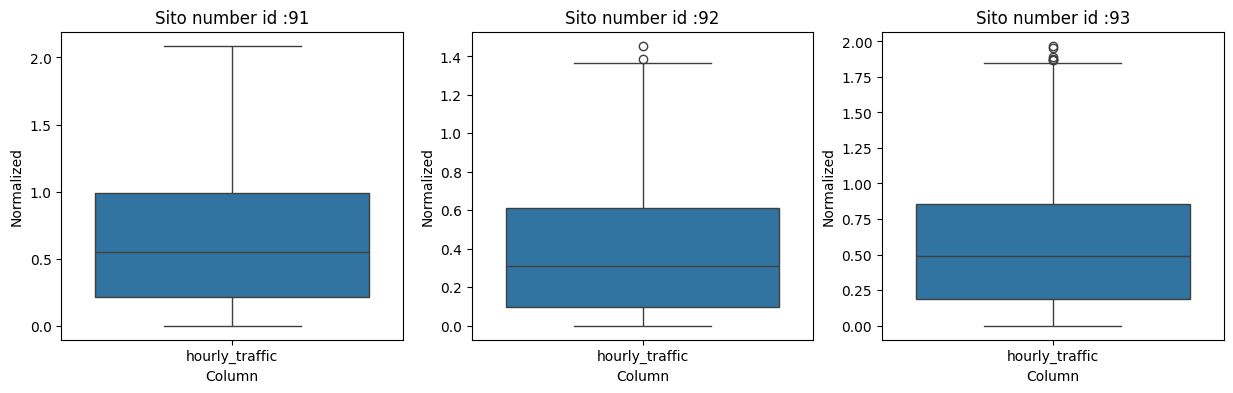

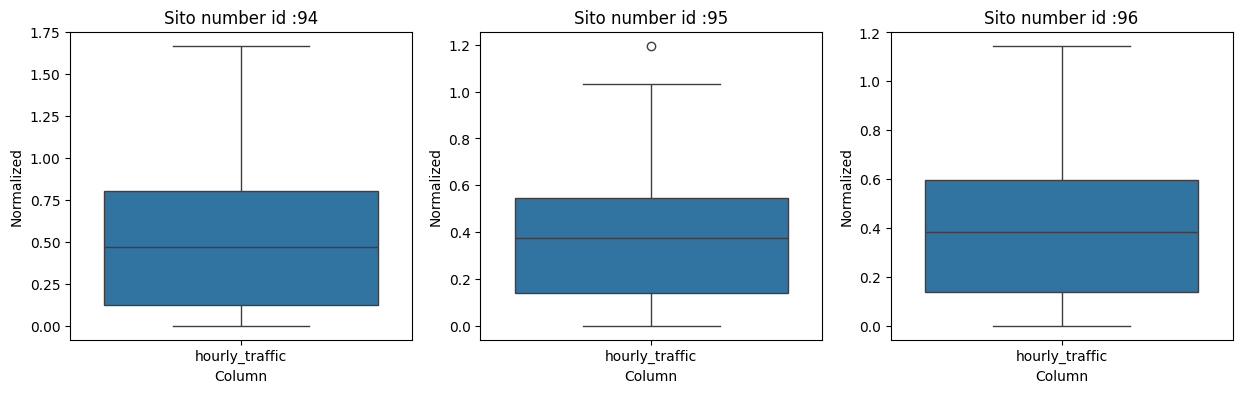

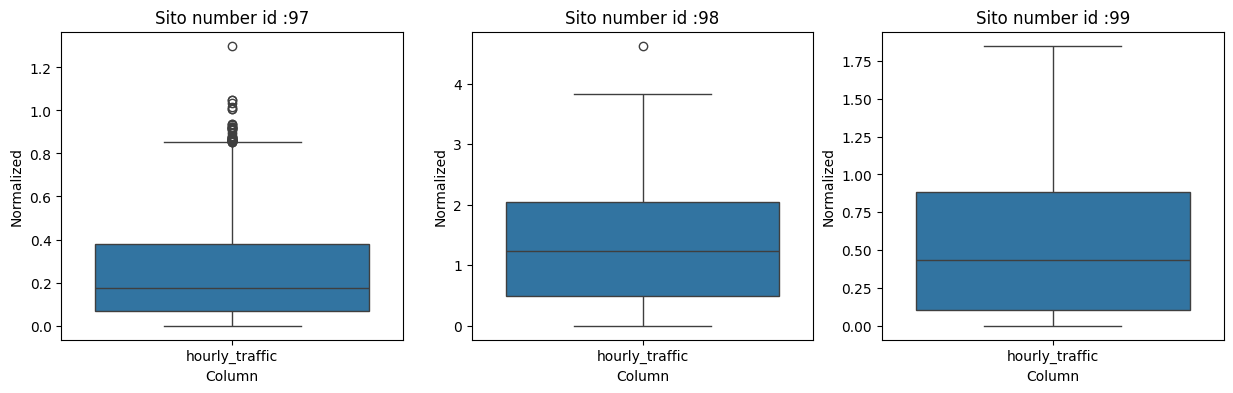

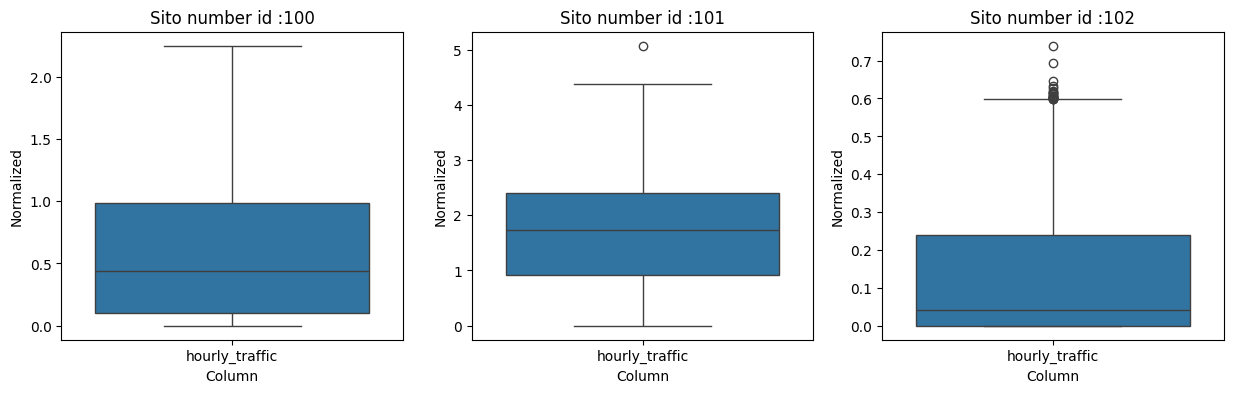

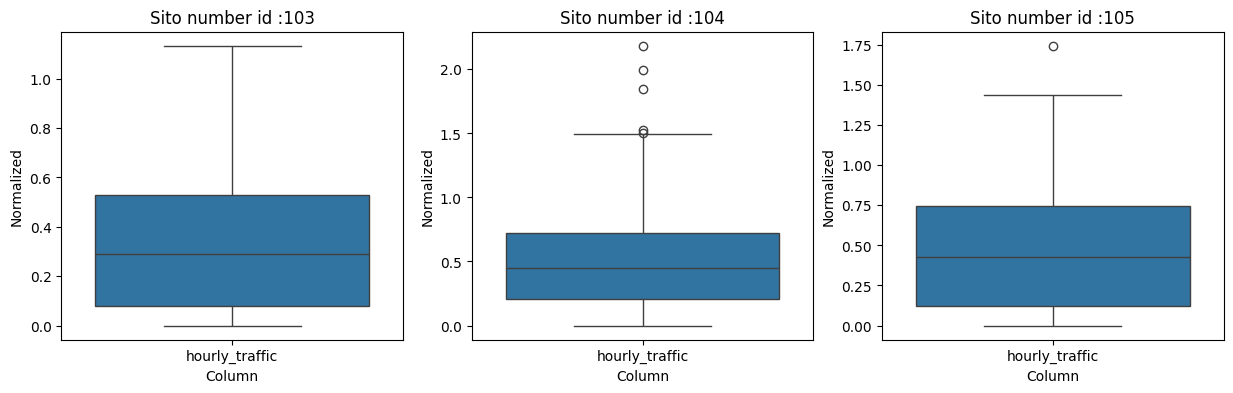

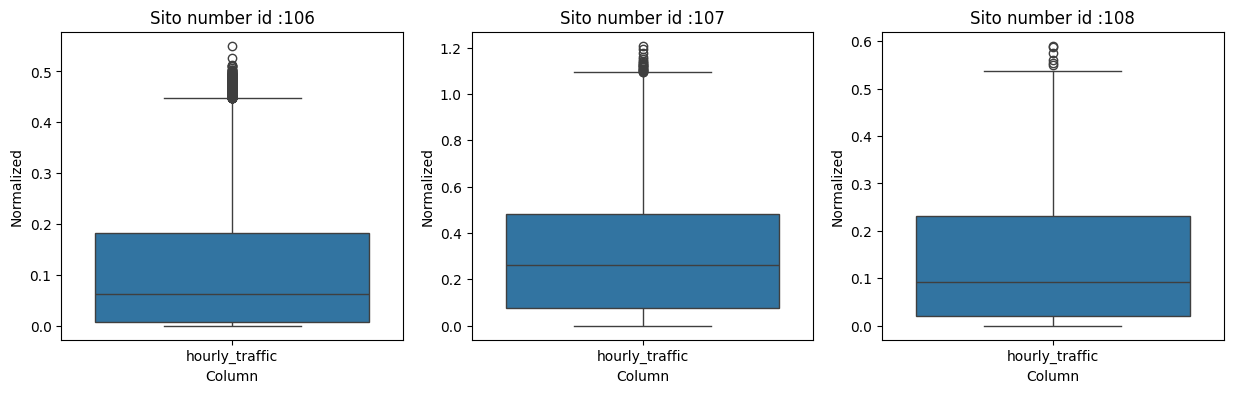

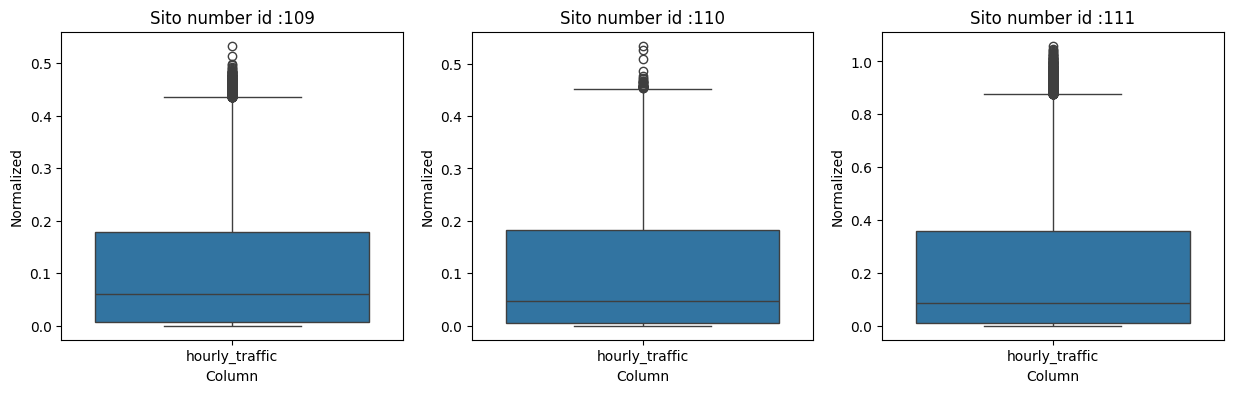

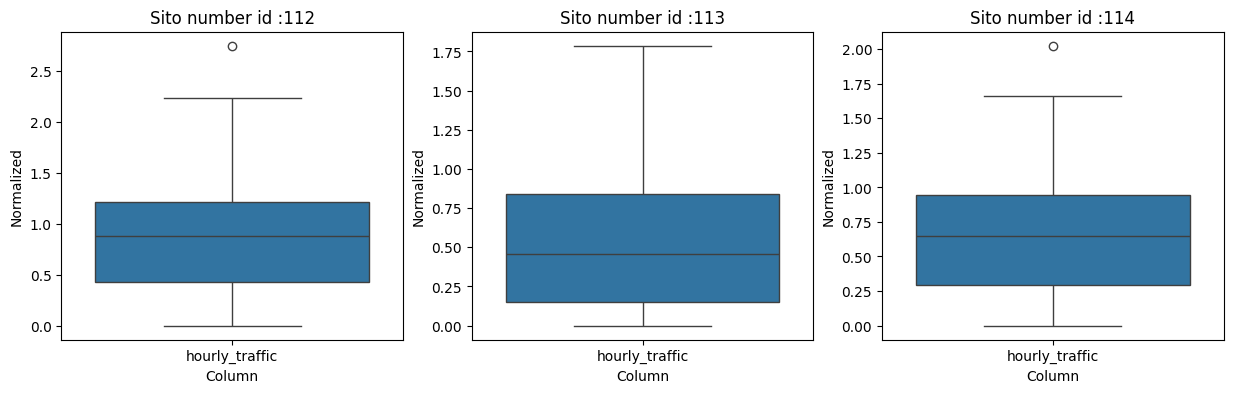

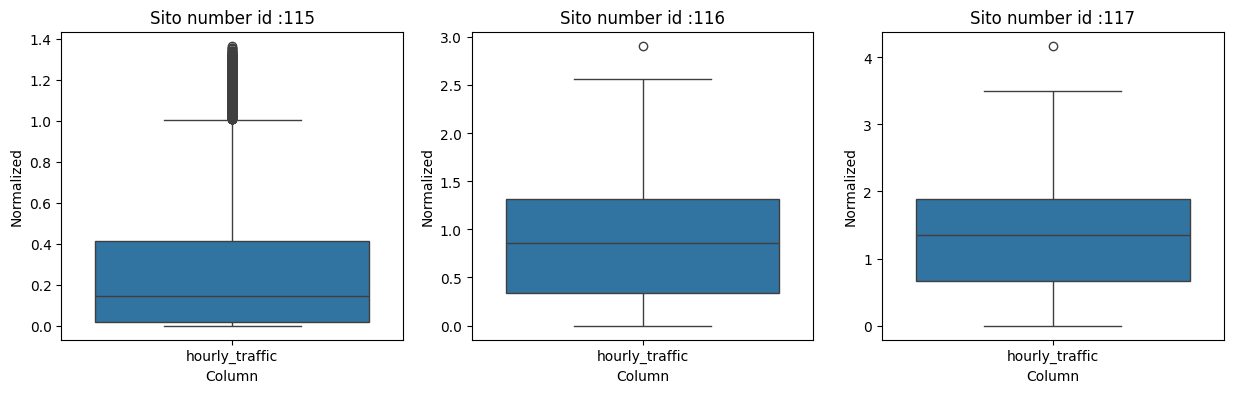

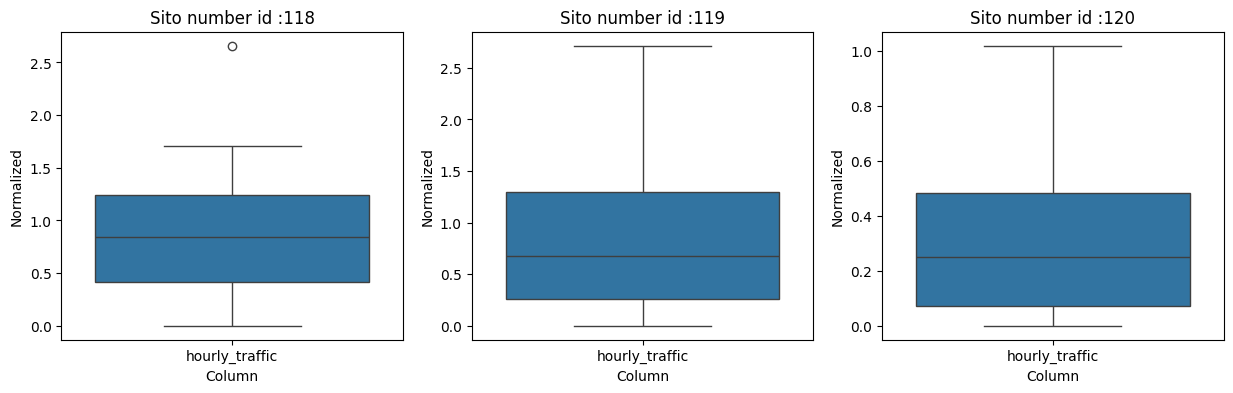

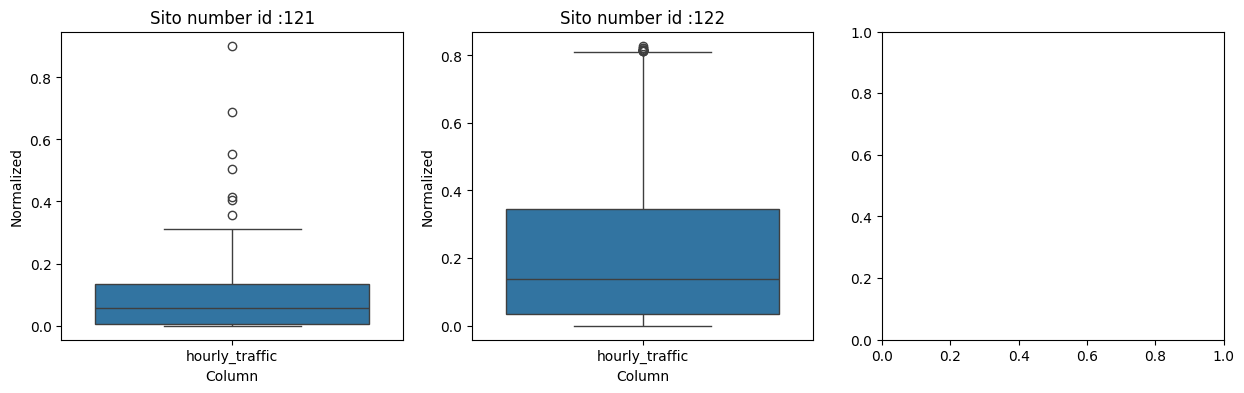

In [ ]:
for i in range(1,123,3) :
        fig, axs = plt.subplots(1, 3, figsize=(15,4))
        for j in range(3):
            site_id = i + j
            if site_id < 123:
                df_scaled = Data_set.loc[Data_set.site_no == site_id].iloc[:,4:5].melt(var_name='Column', value_name='Normalized')
                axs[j].set_title(f"Sito number id :{site_id}")
                sns.boxplot(x='Column', y='Normalized', data=df_scaled, ax=axs[j])

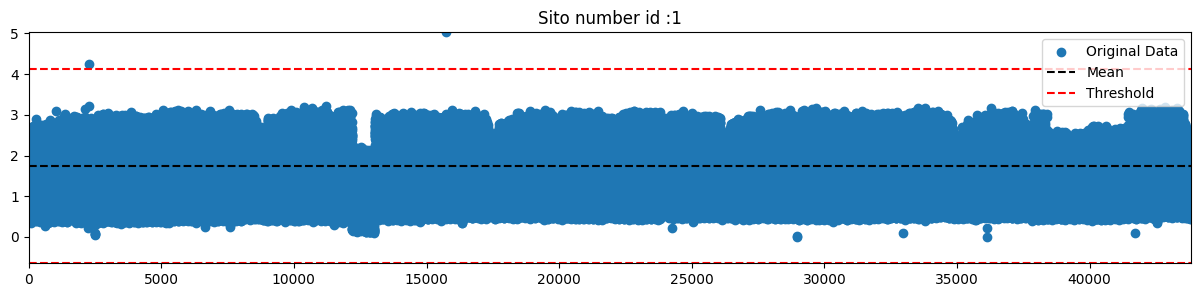

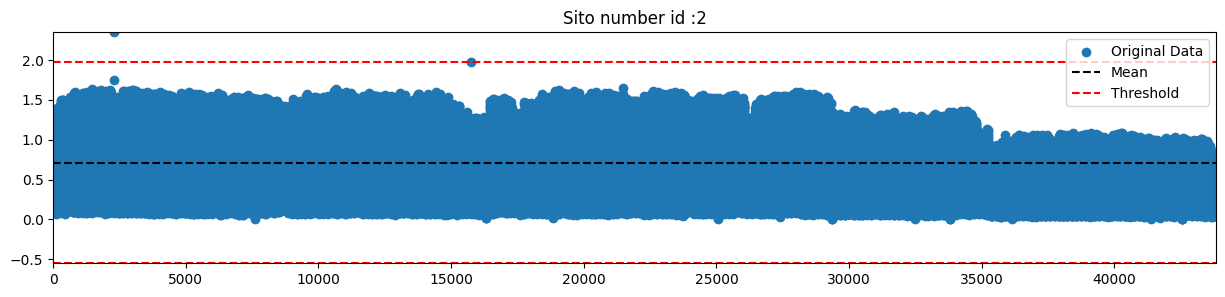

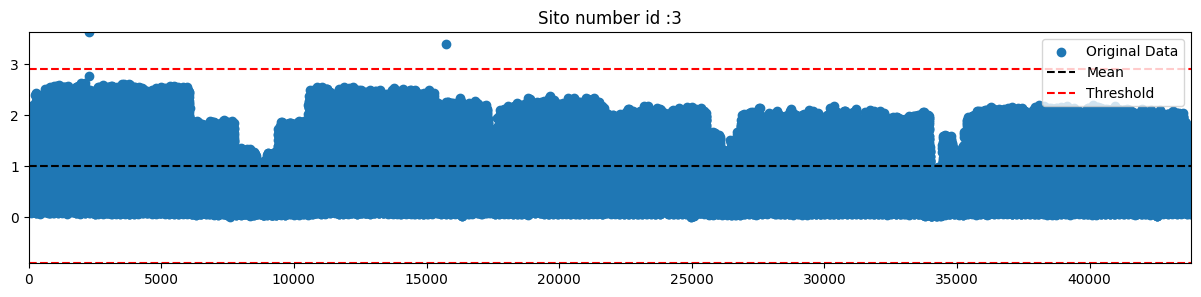

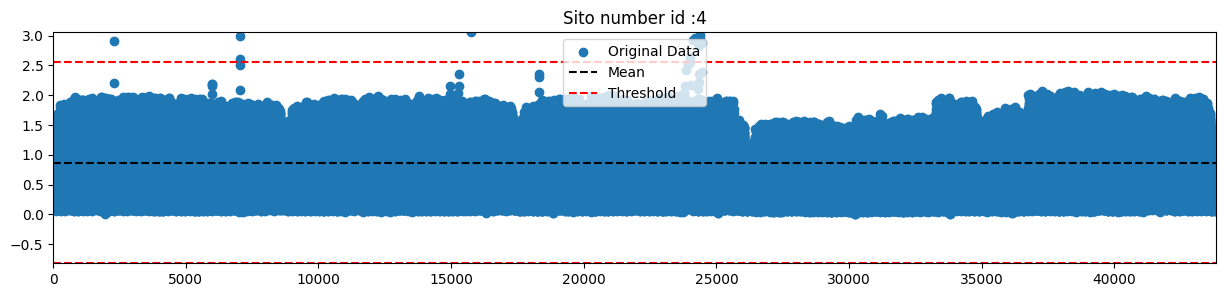

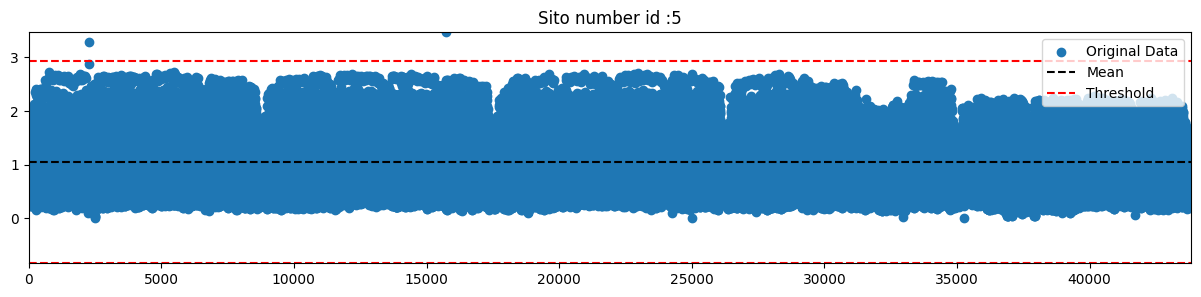

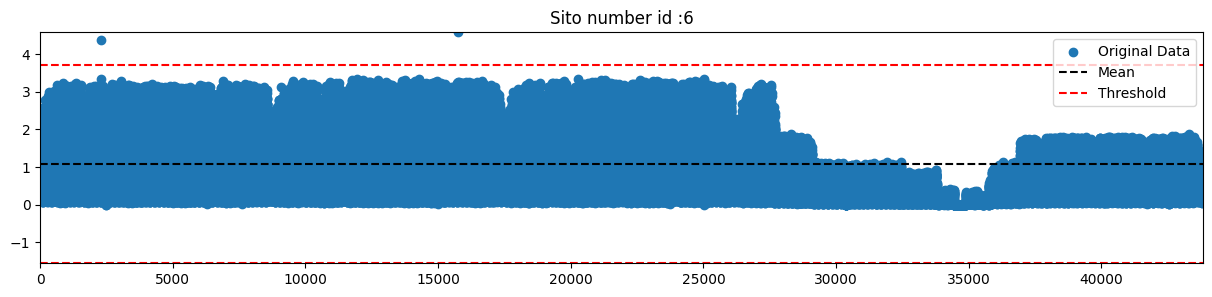

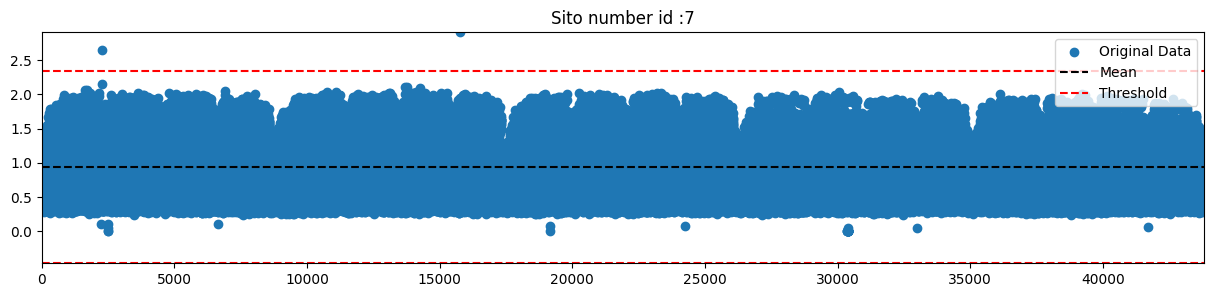

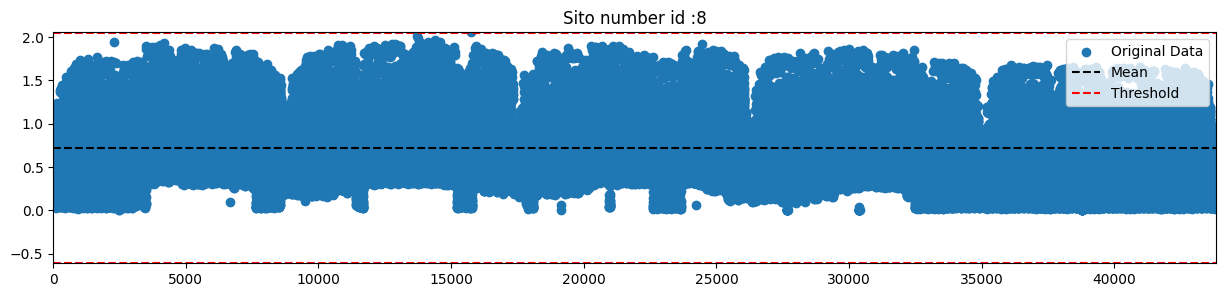

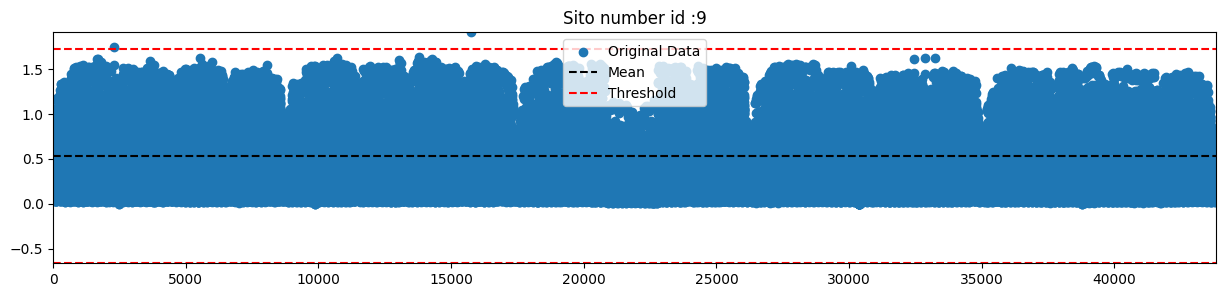

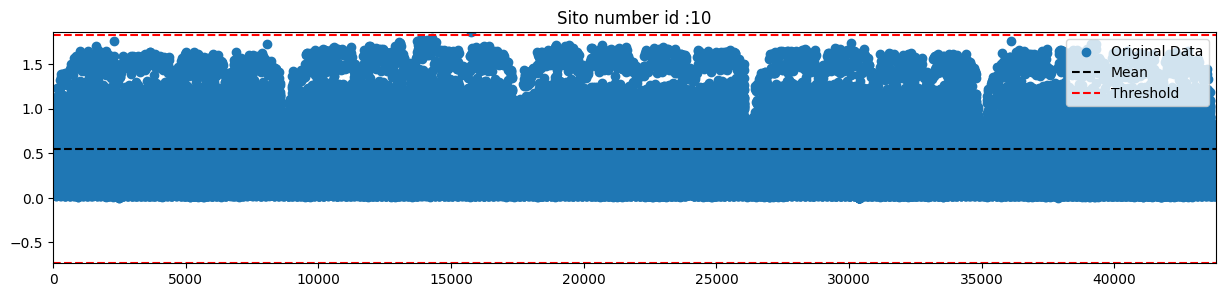

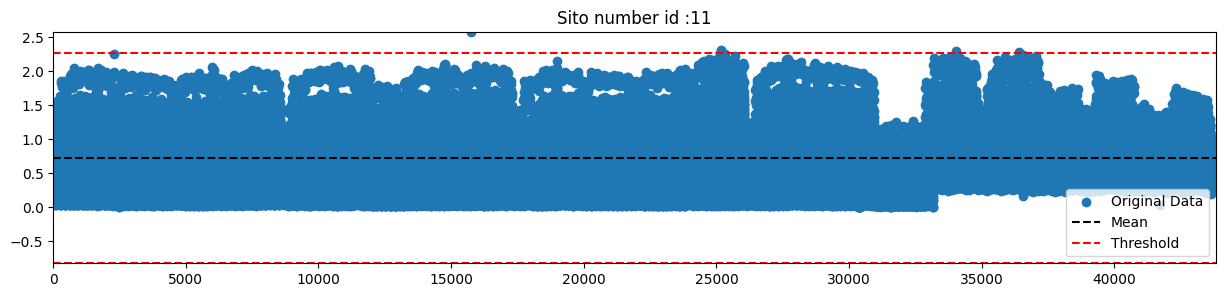

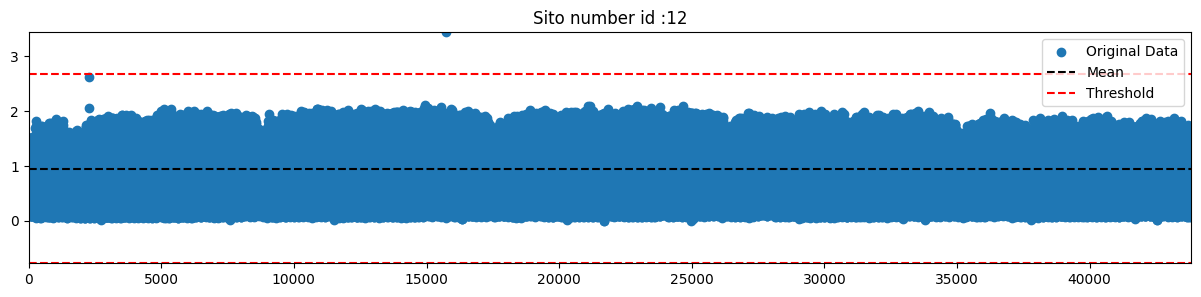

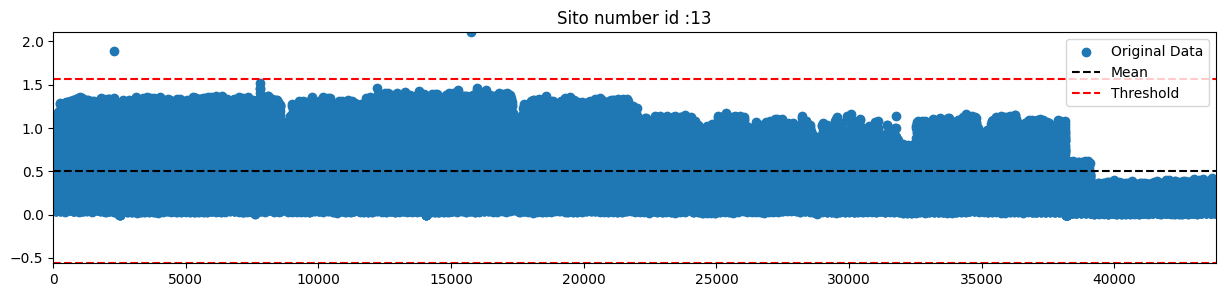

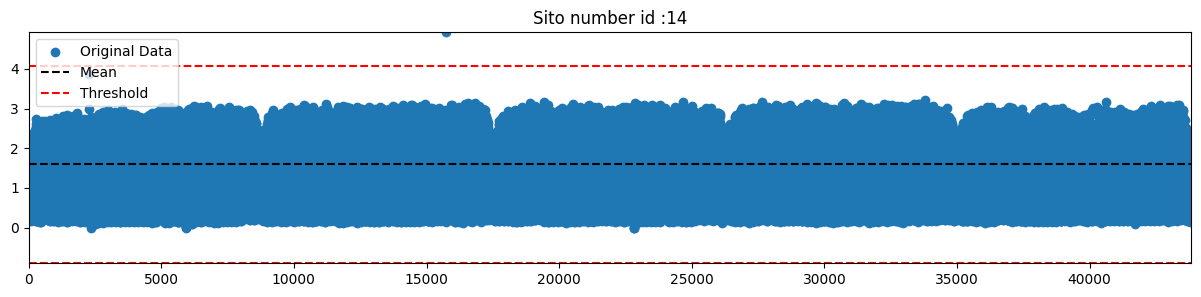

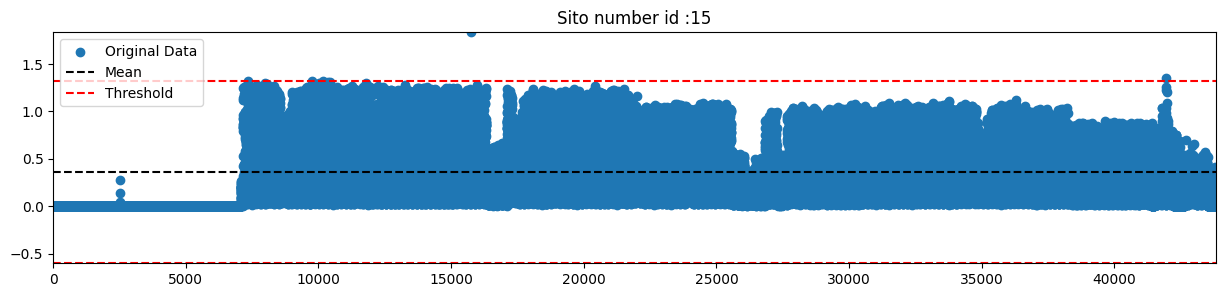

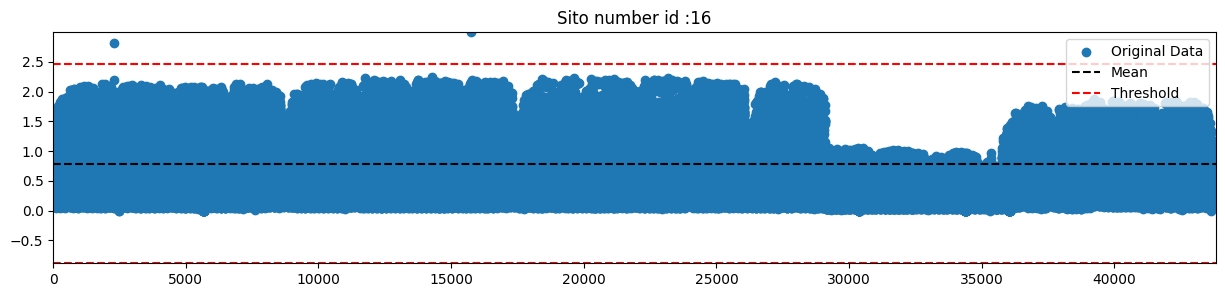

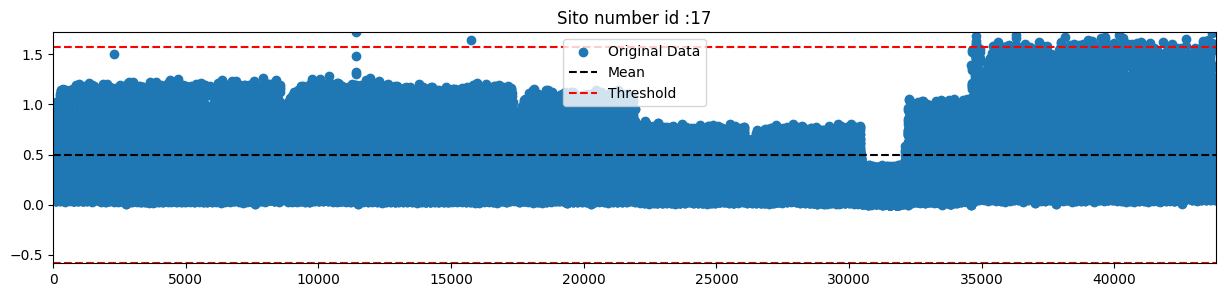

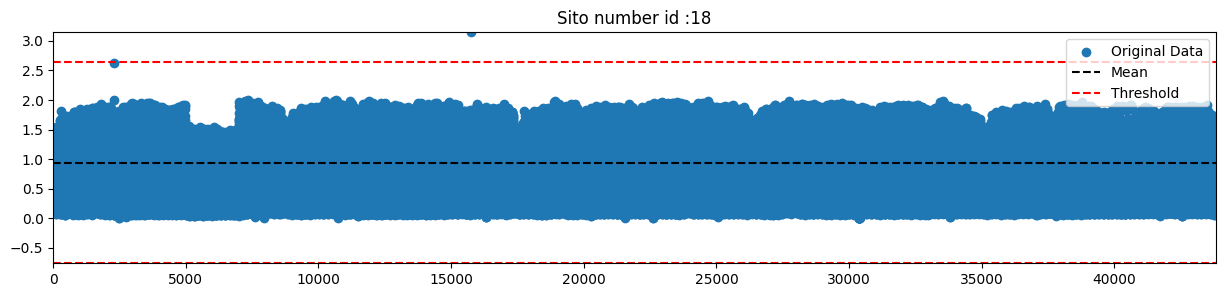

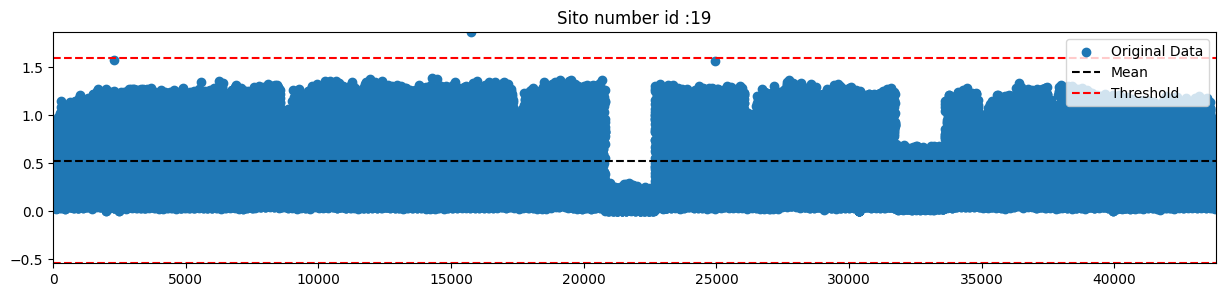

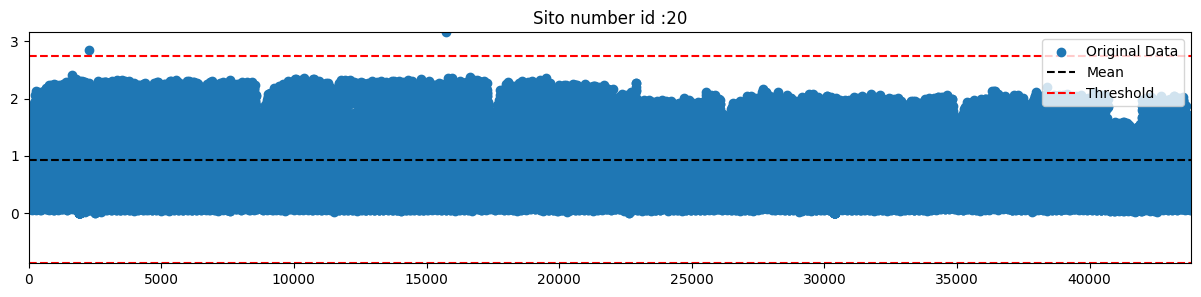

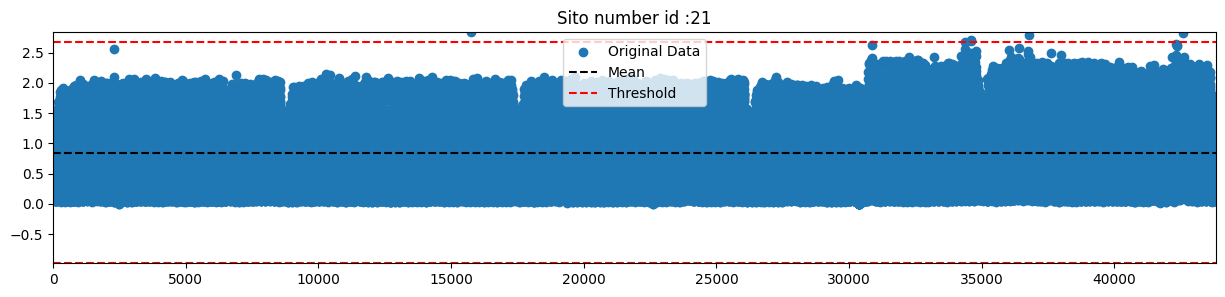

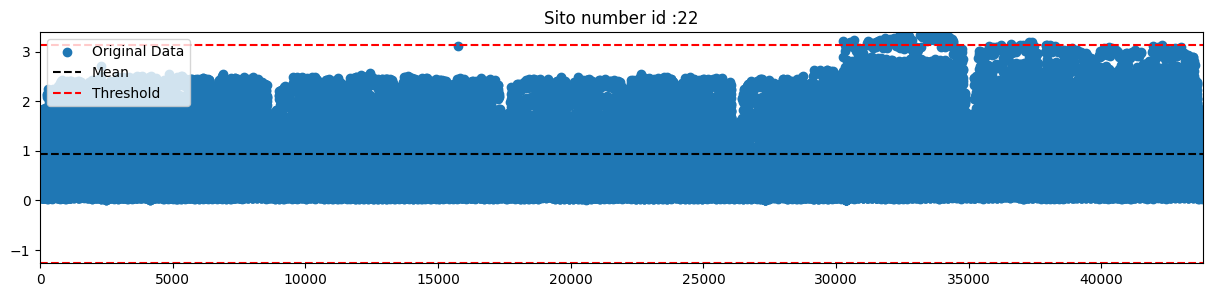

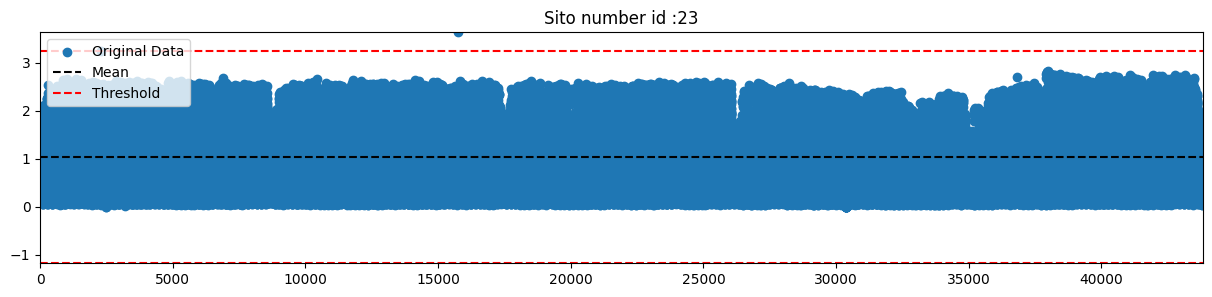

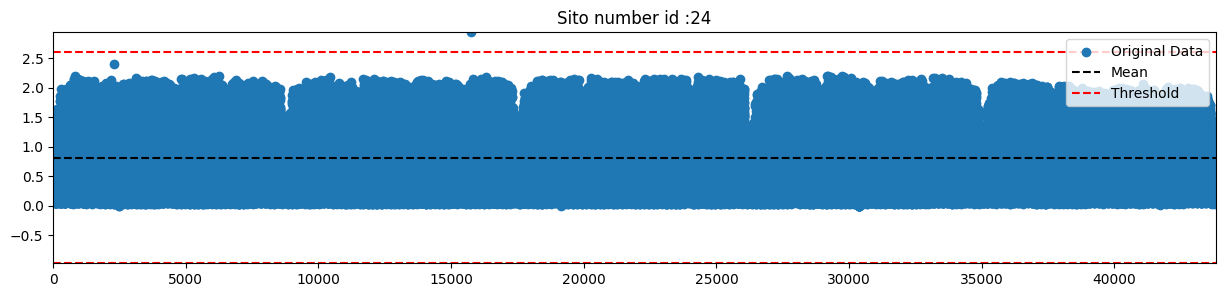

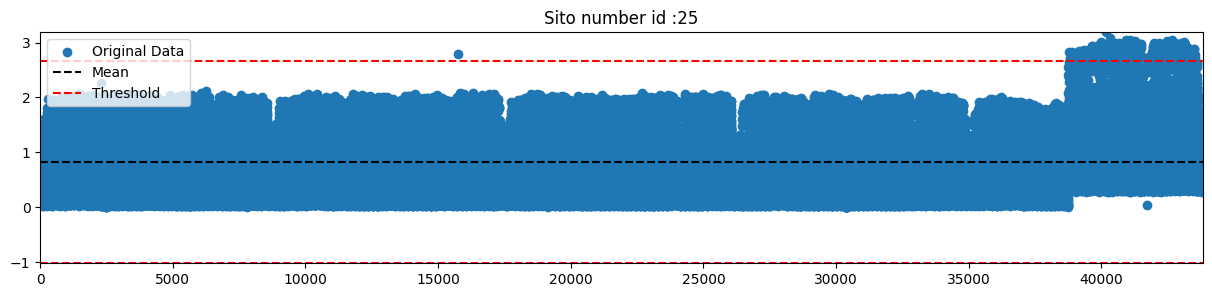

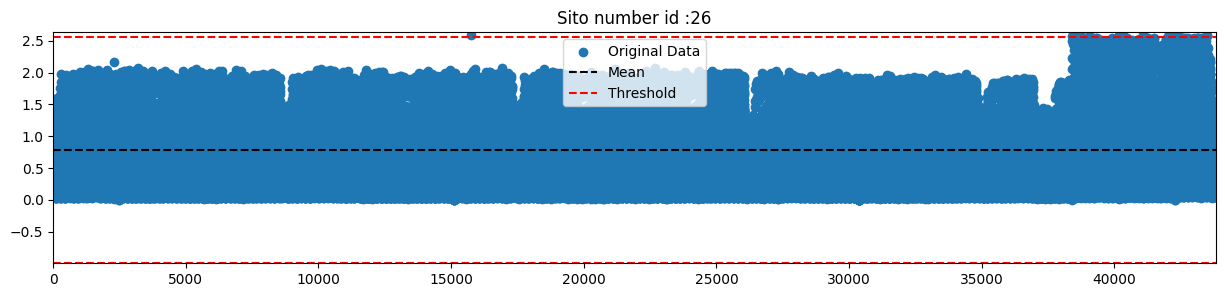

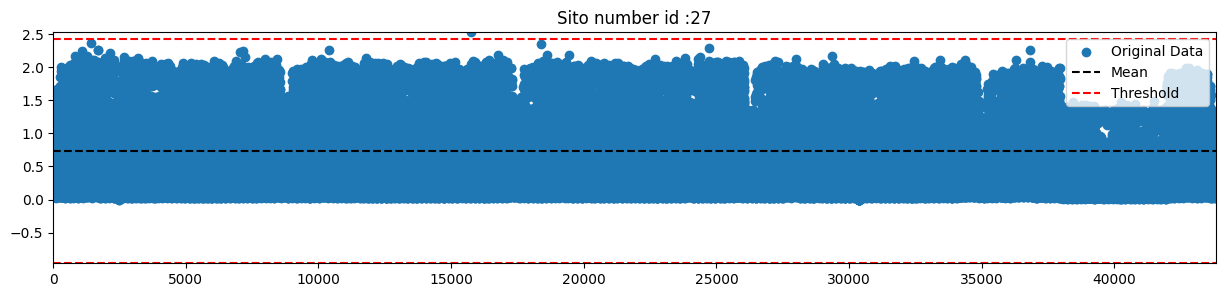

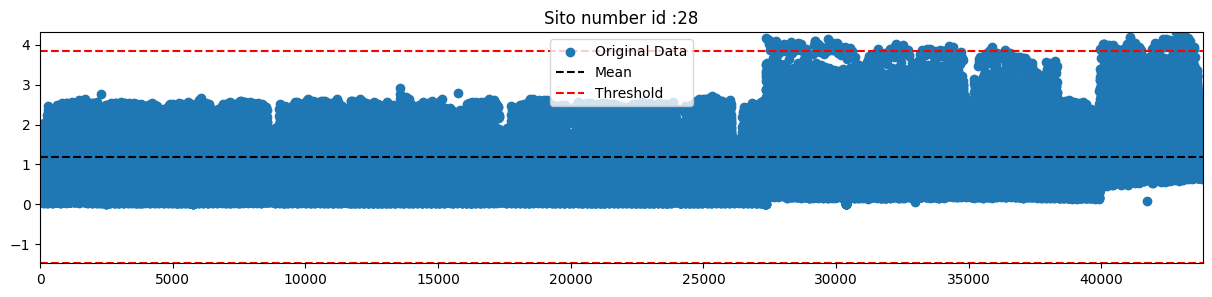

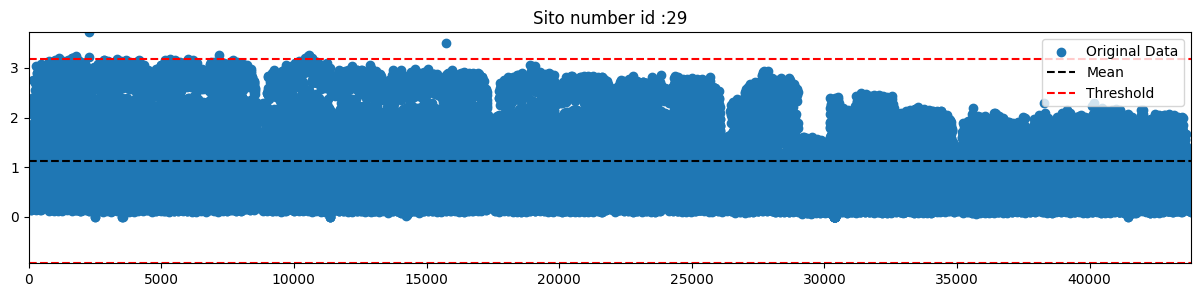

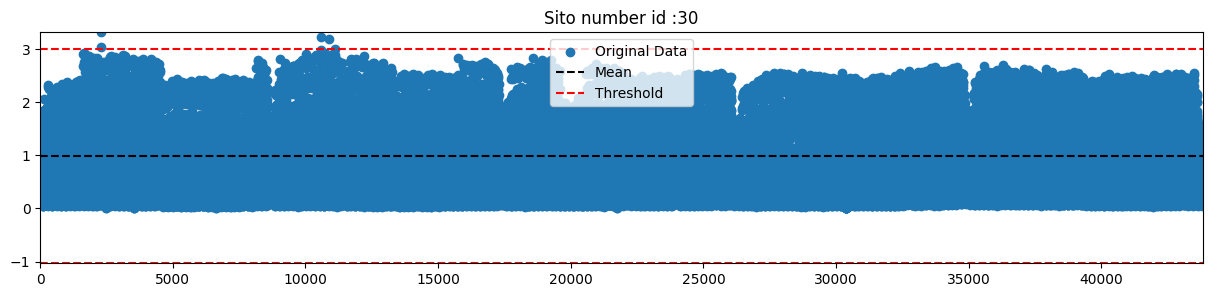

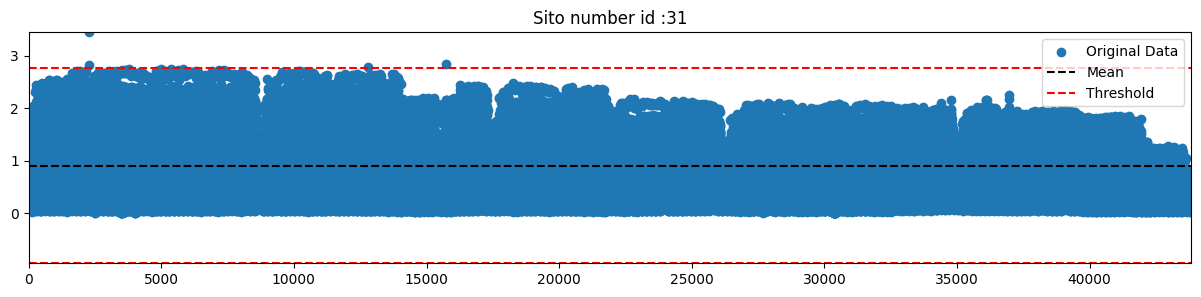

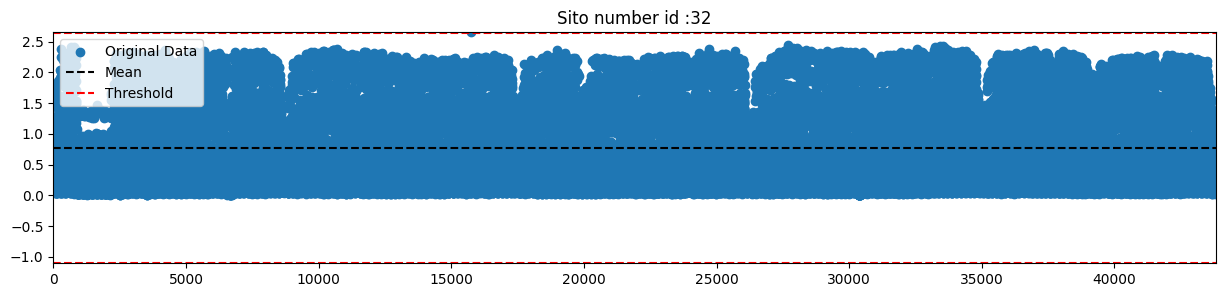

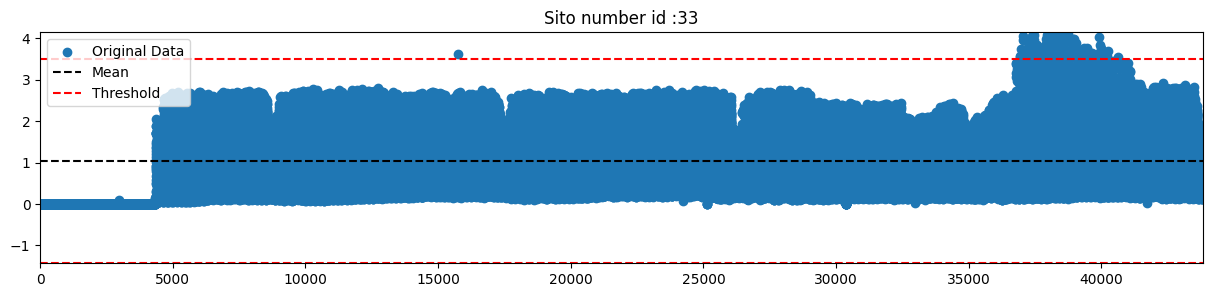

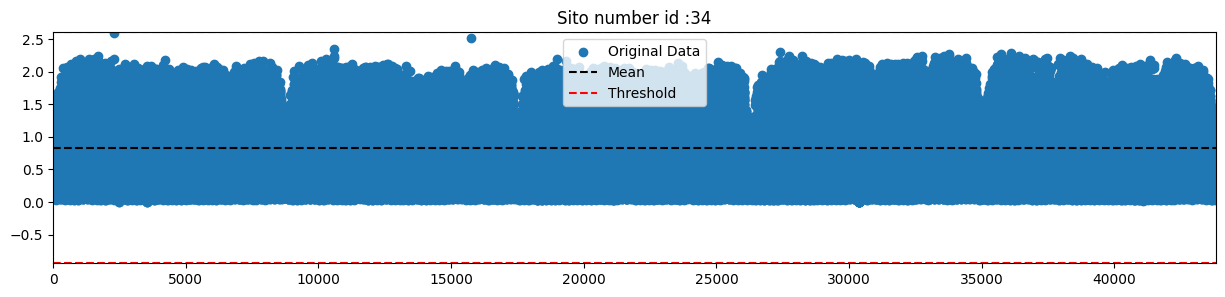

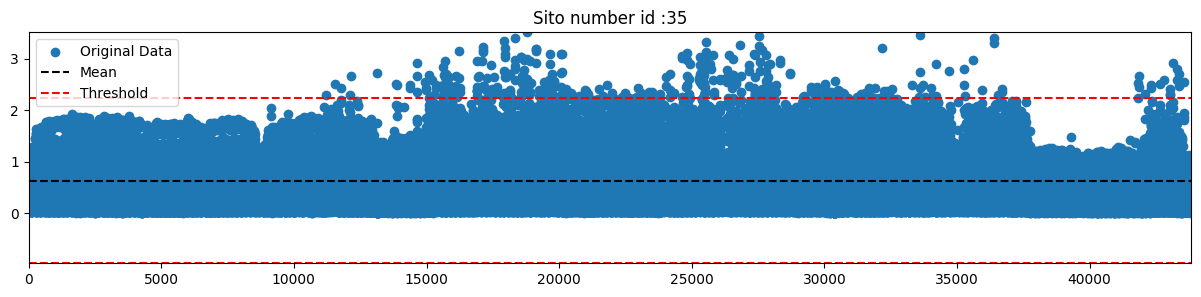

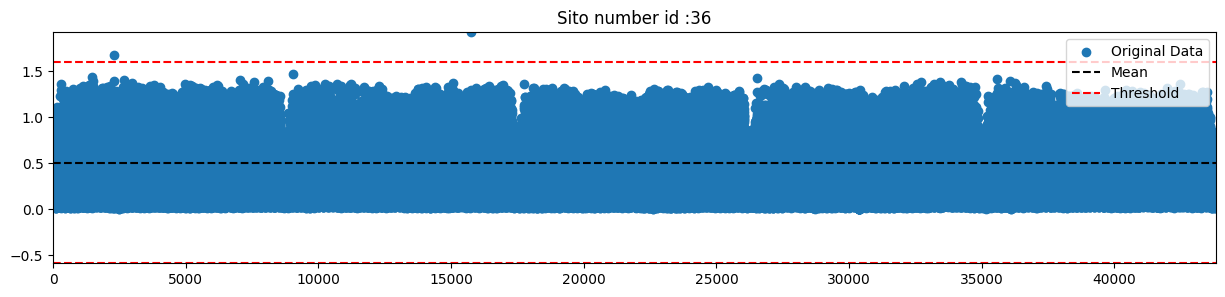

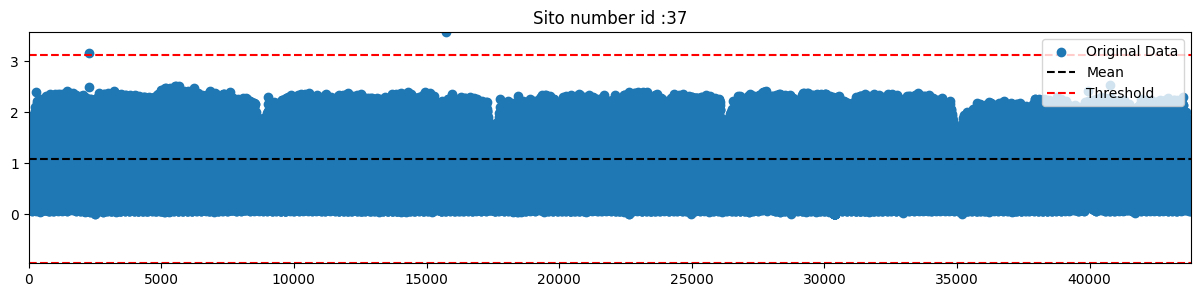

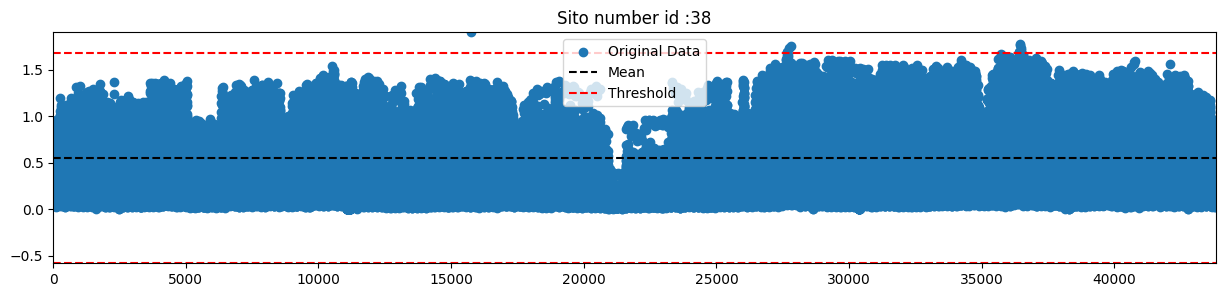

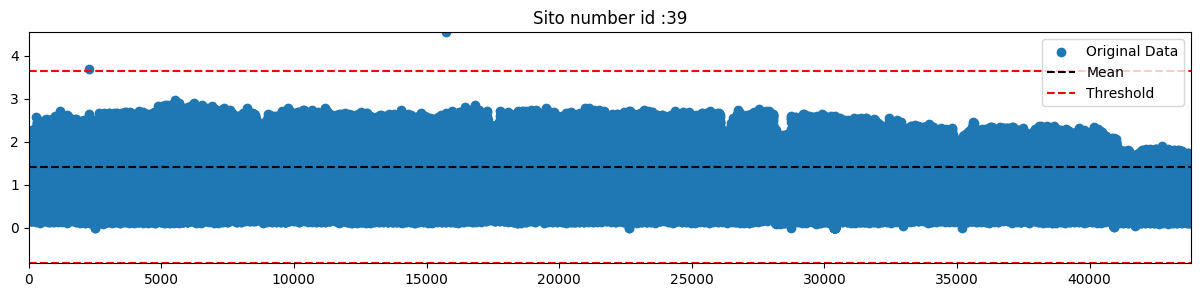

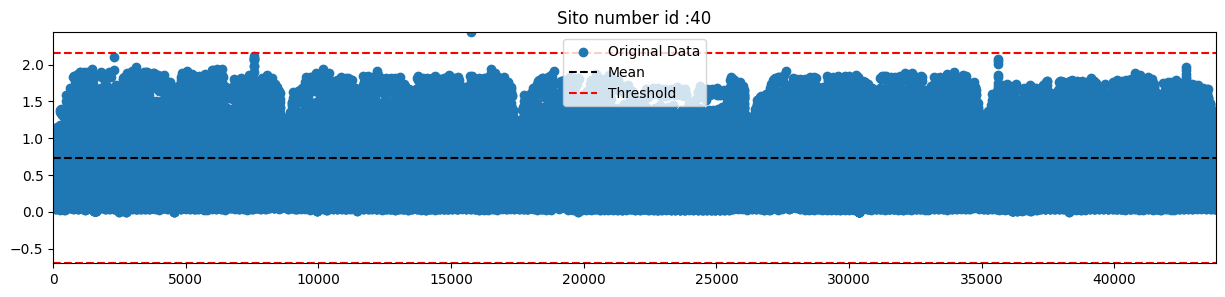

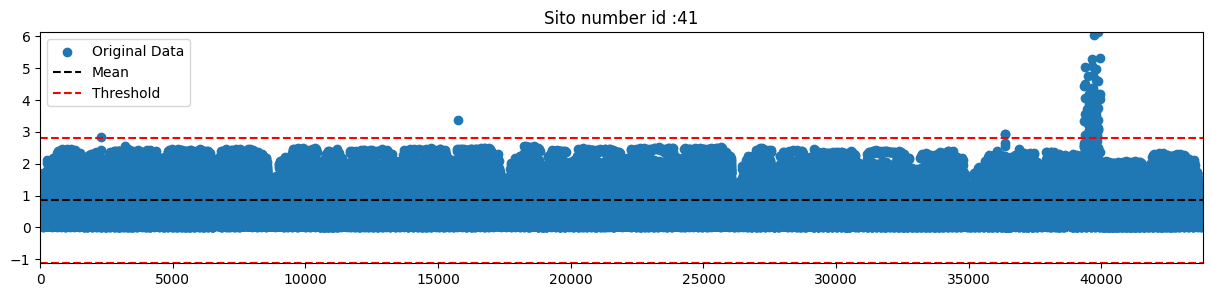

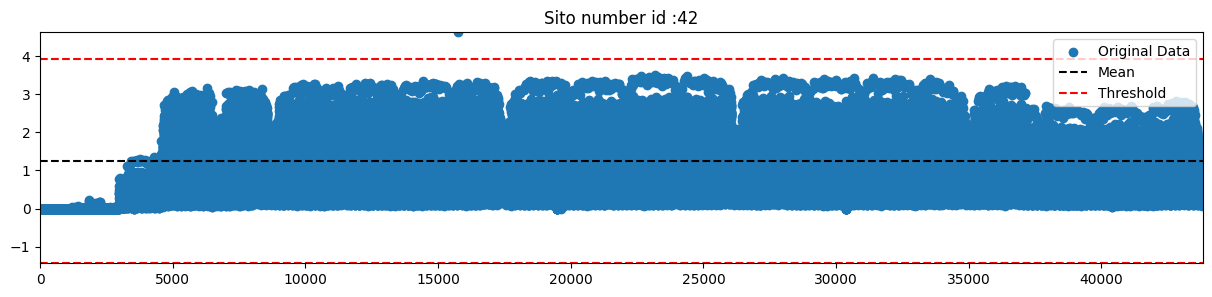

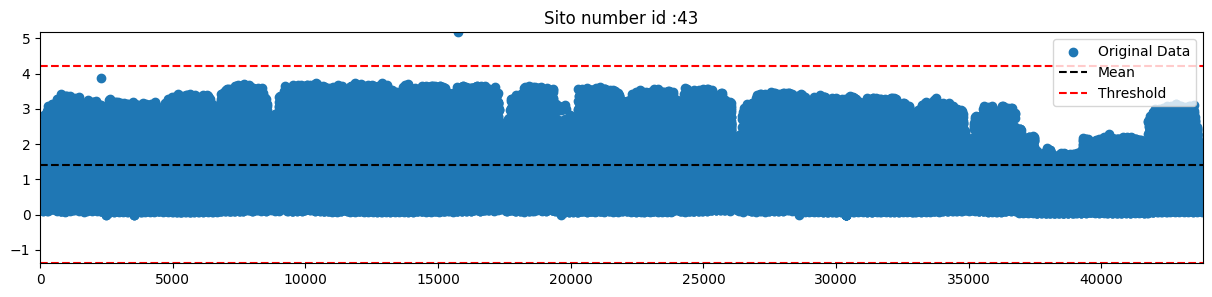

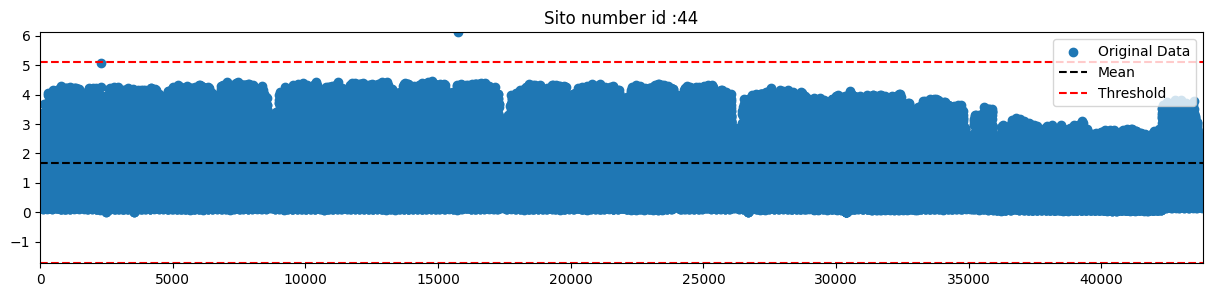

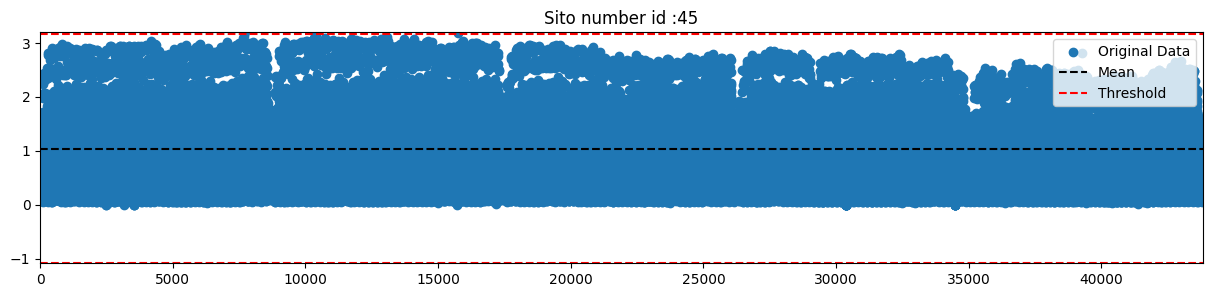

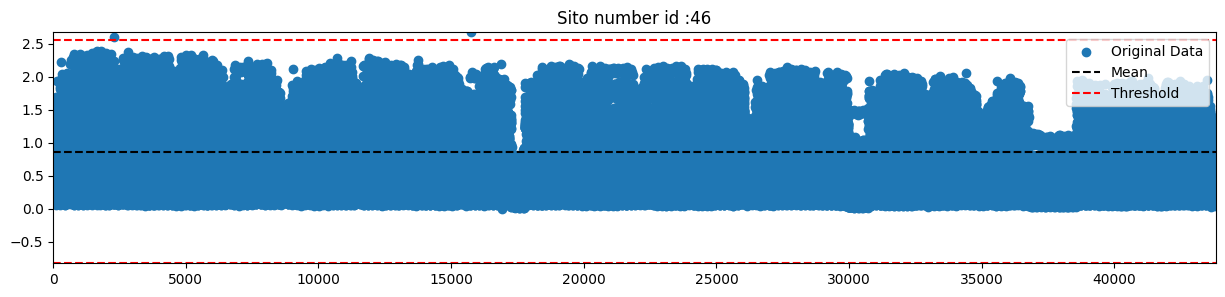

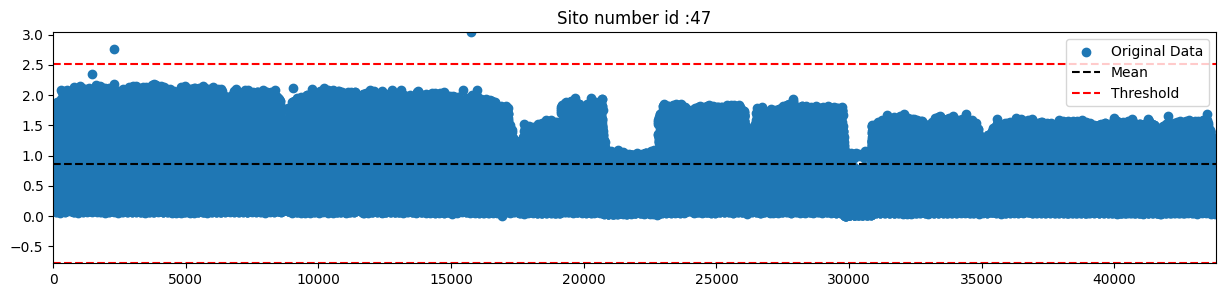

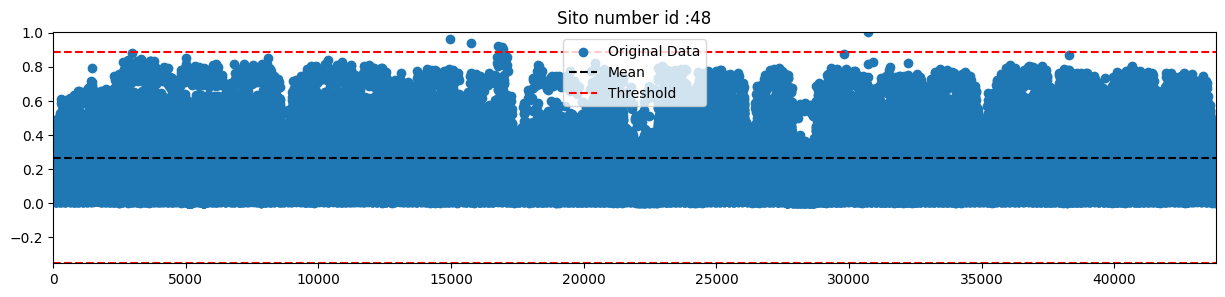

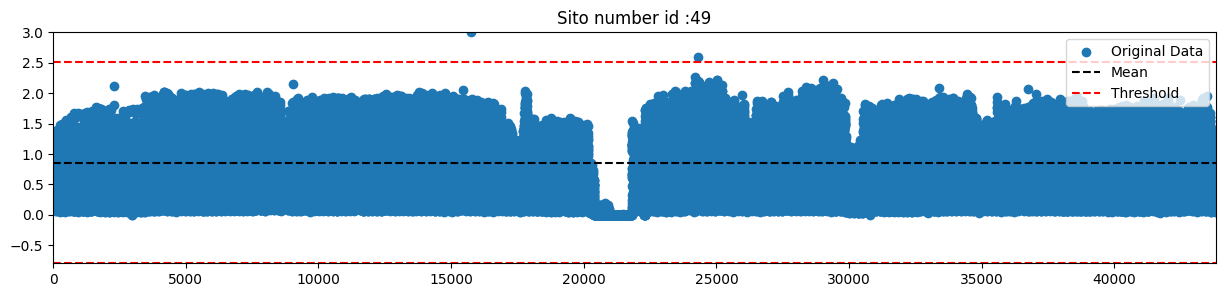

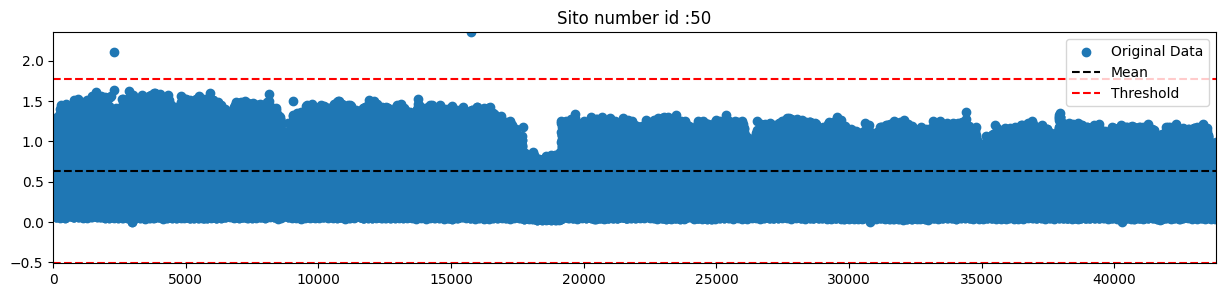

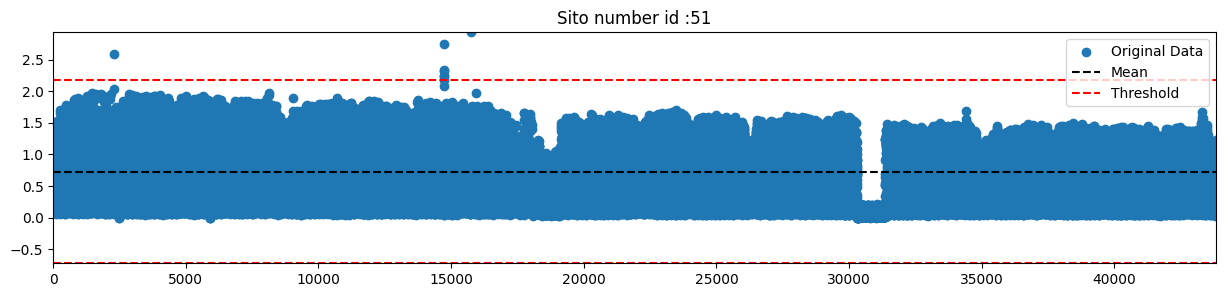

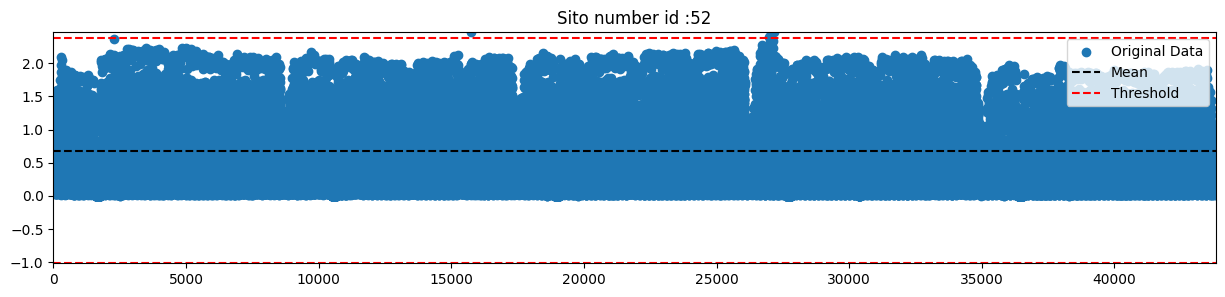

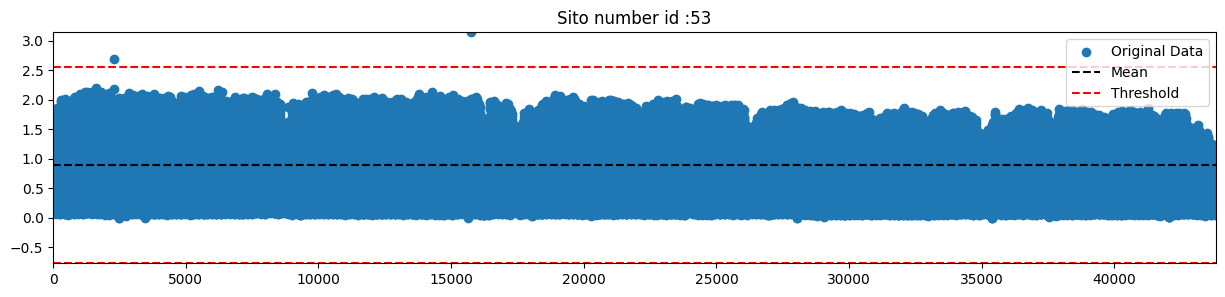

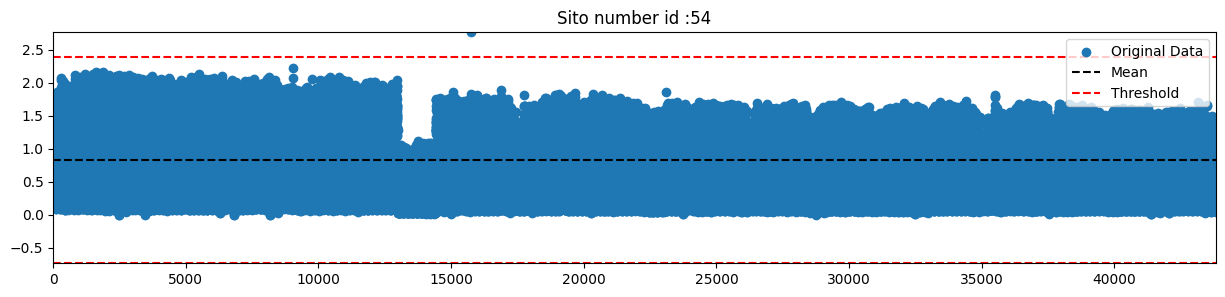

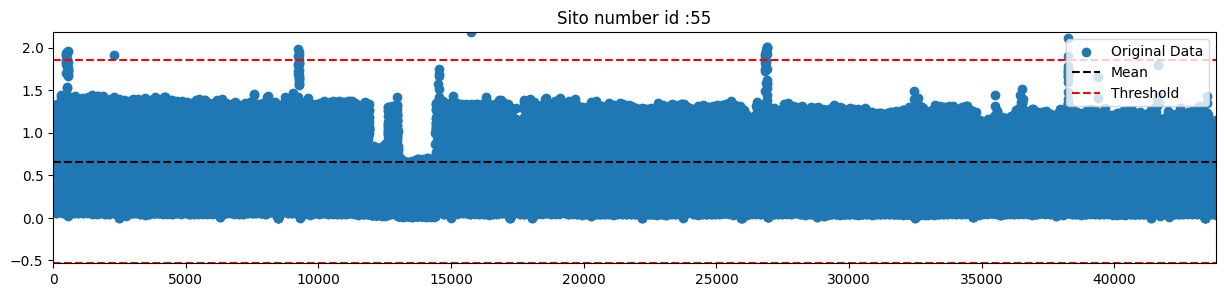

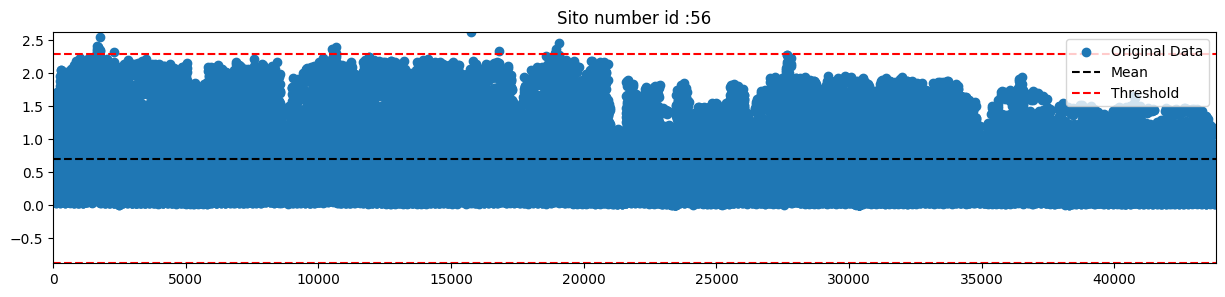

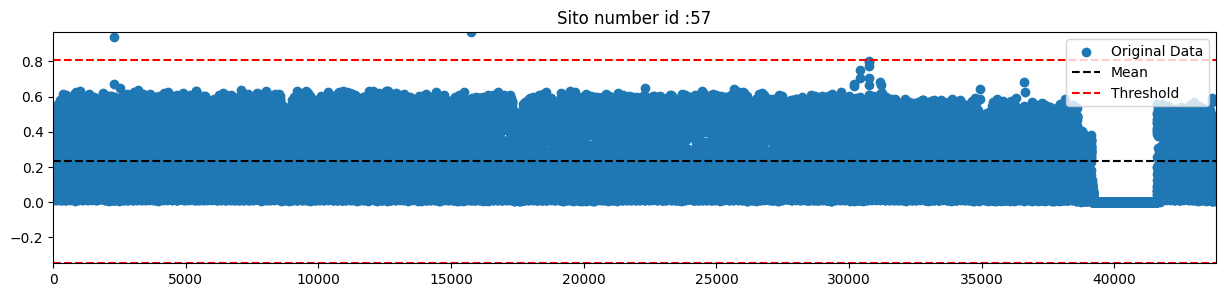

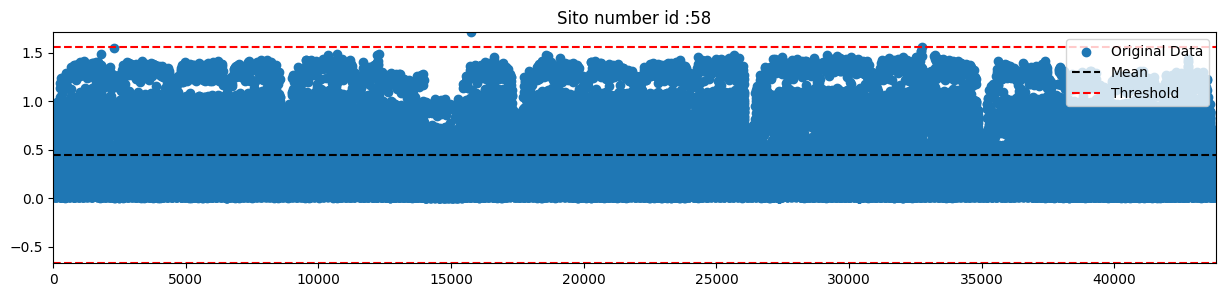

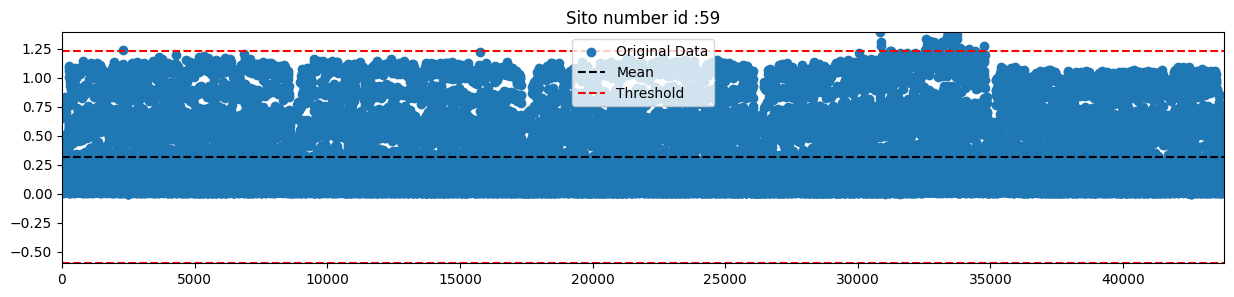

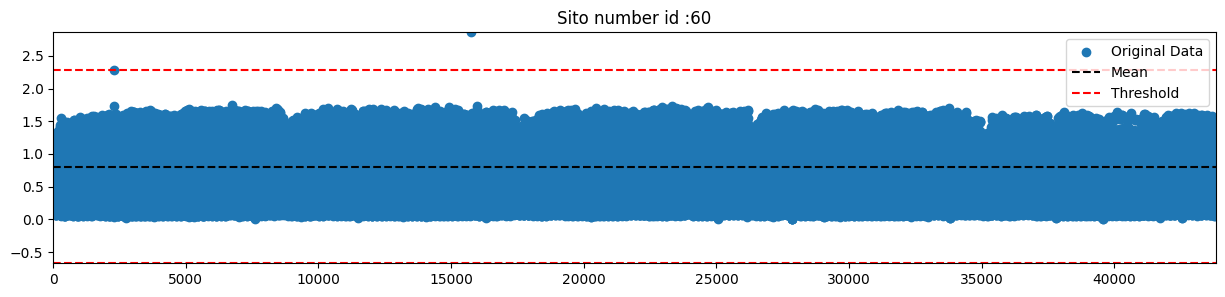

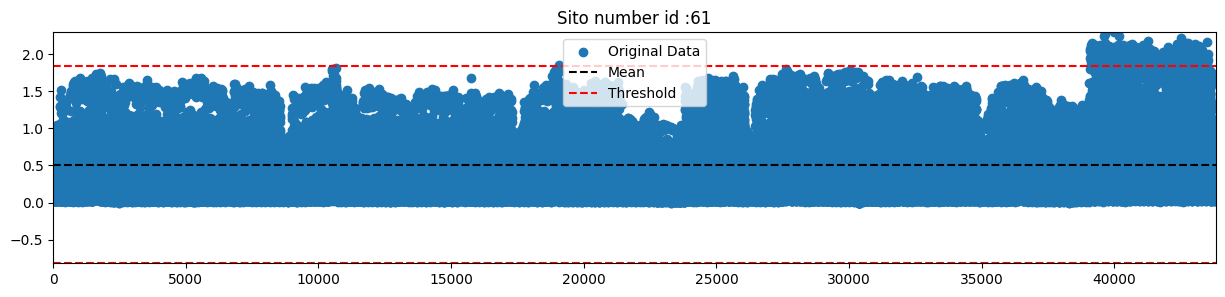

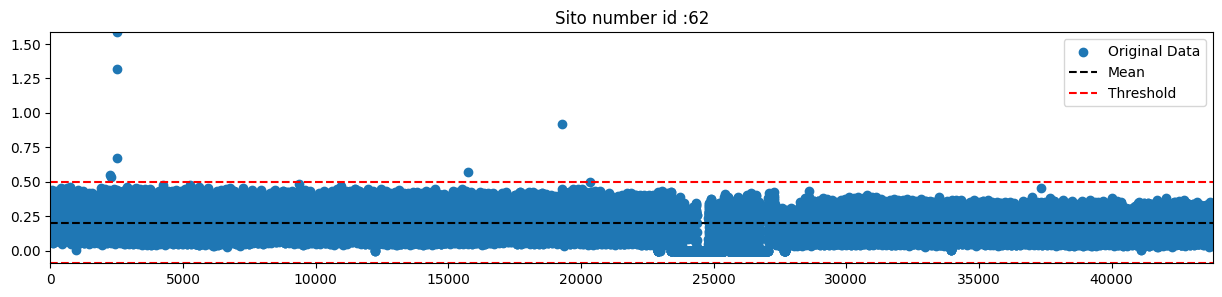

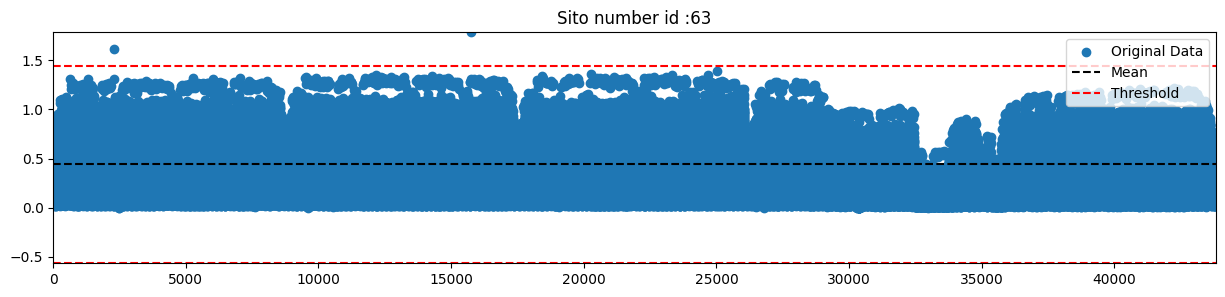

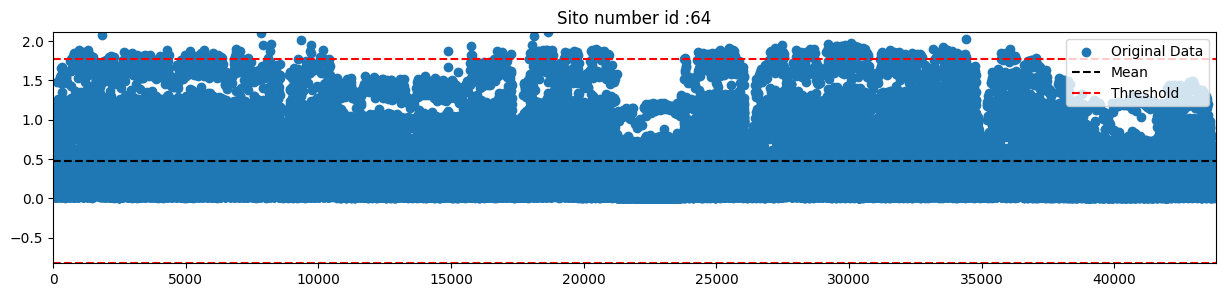

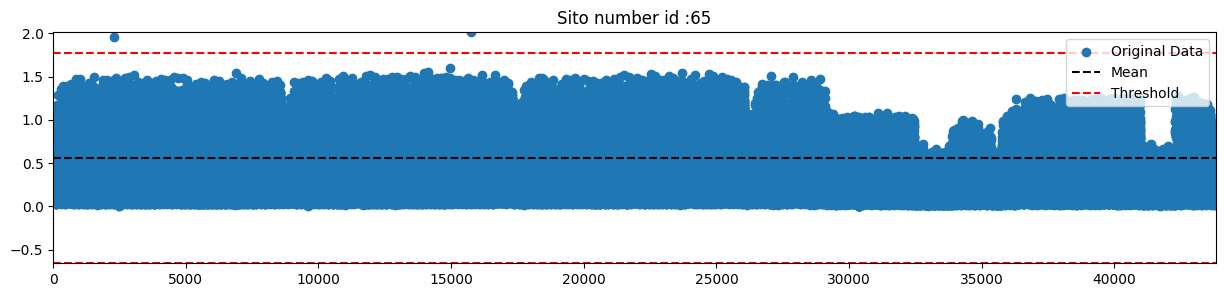

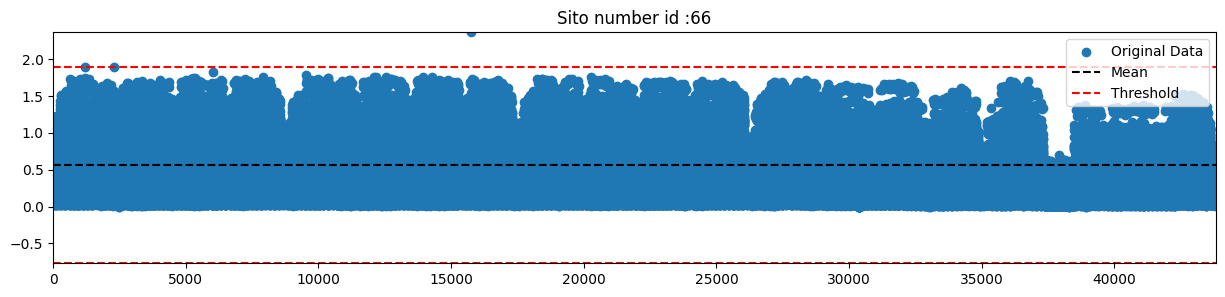

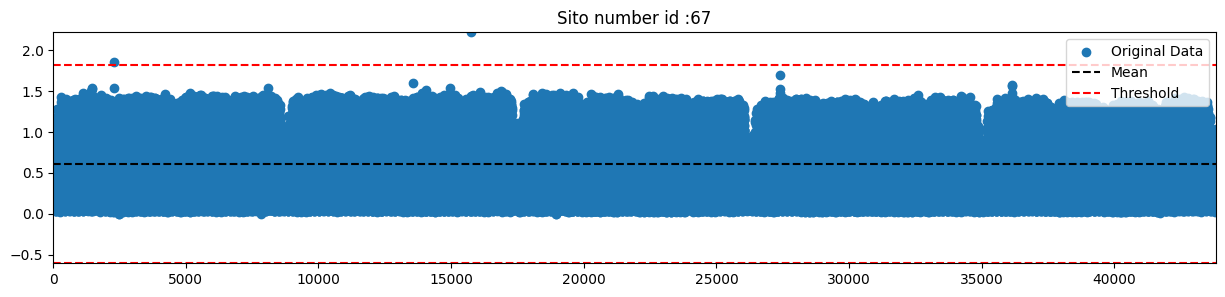

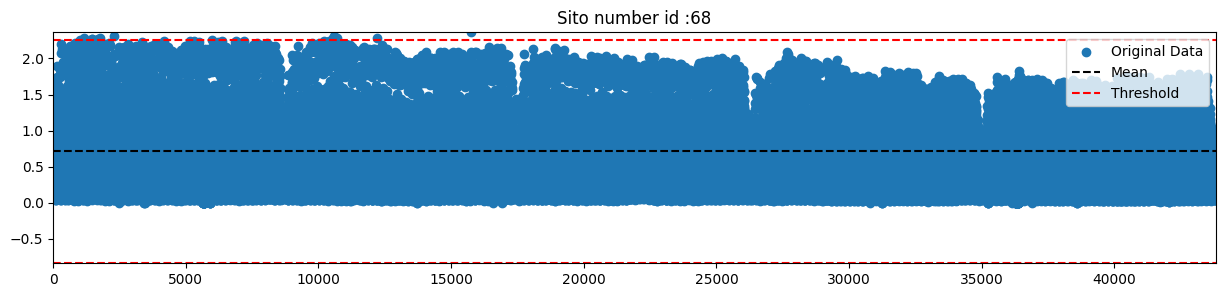

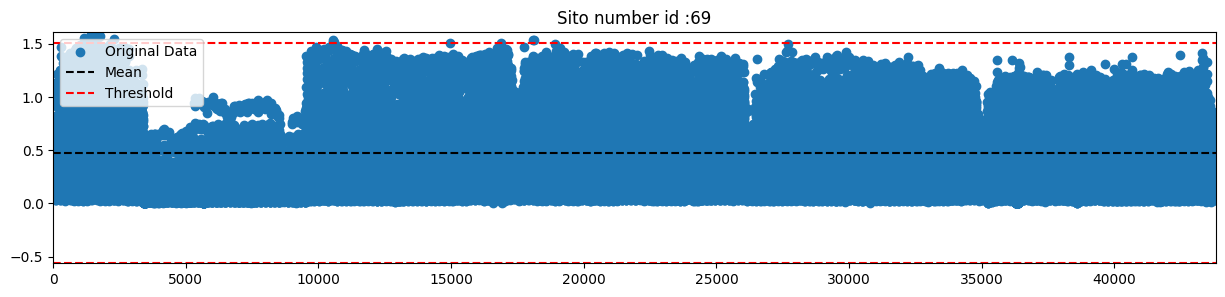

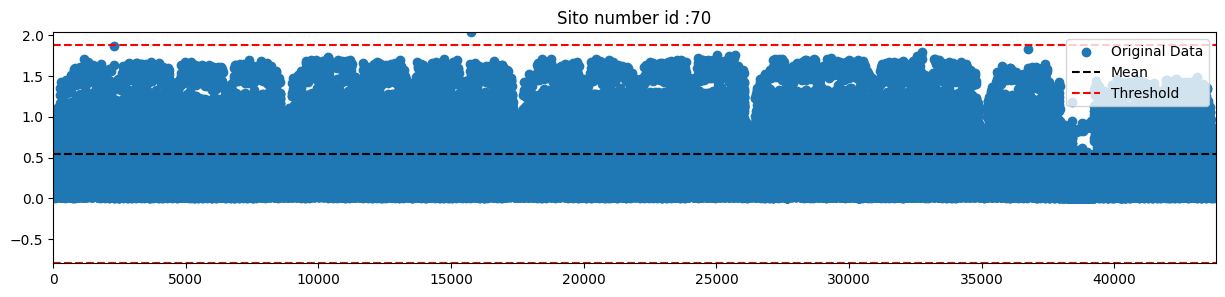

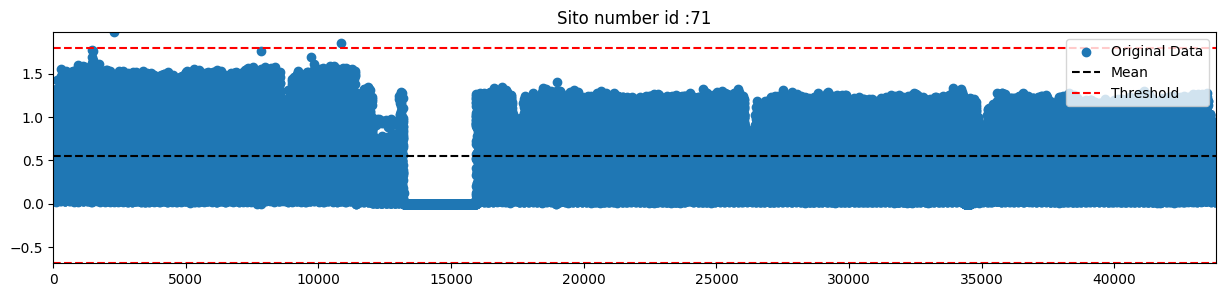

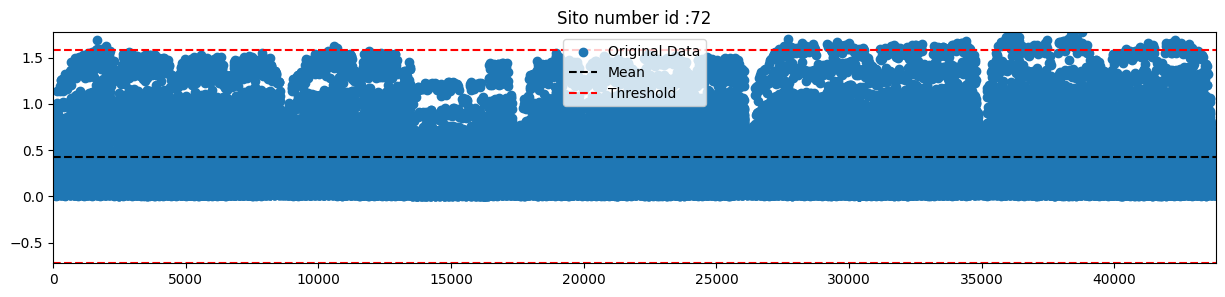

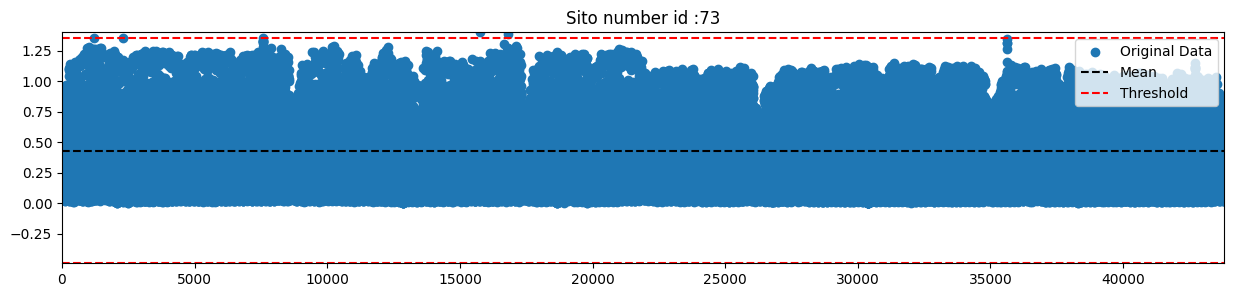

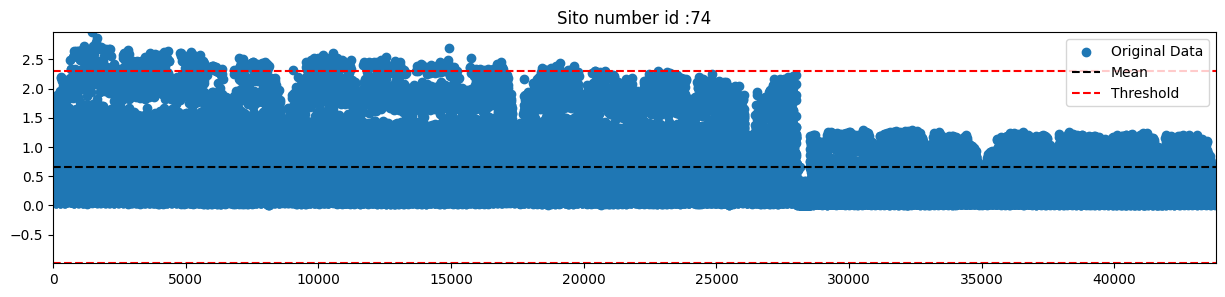

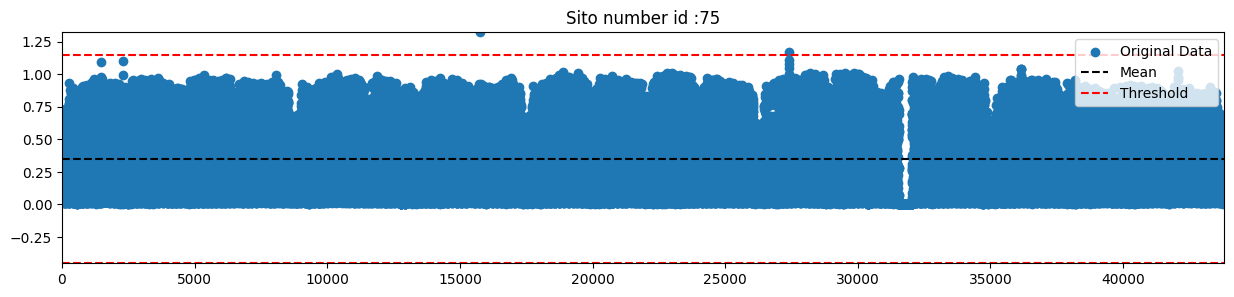

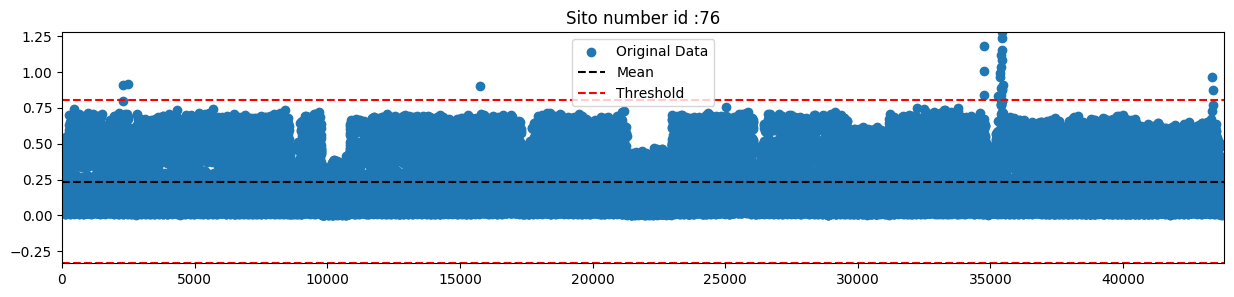

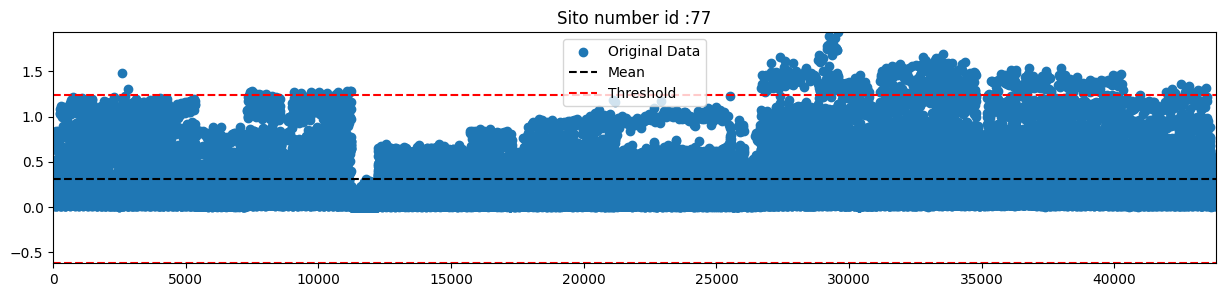

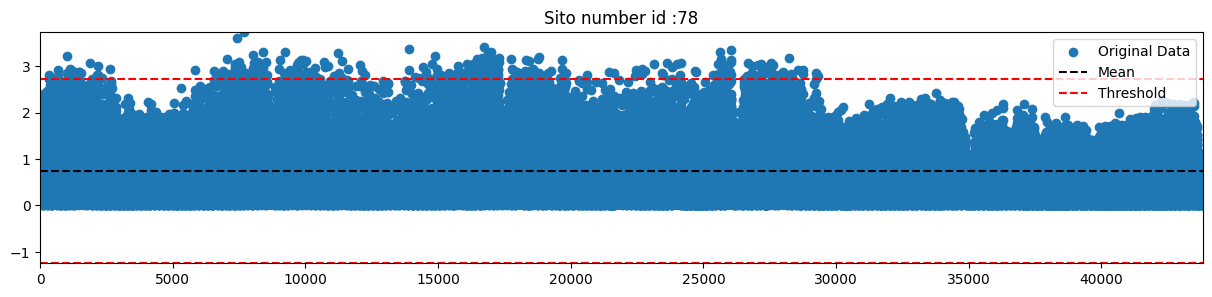

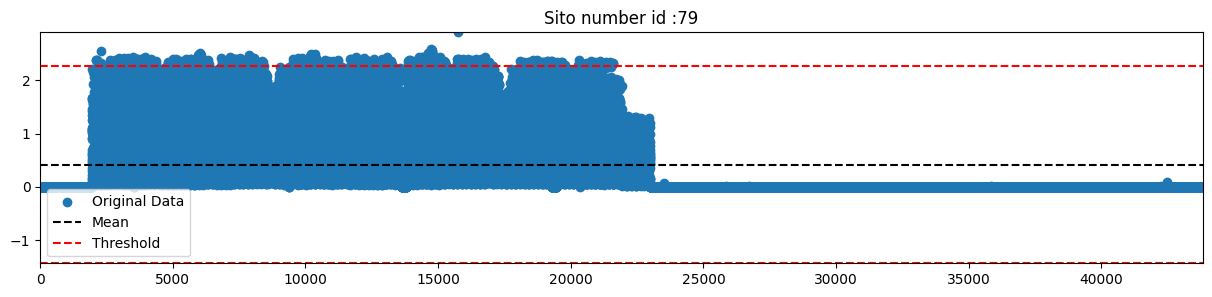

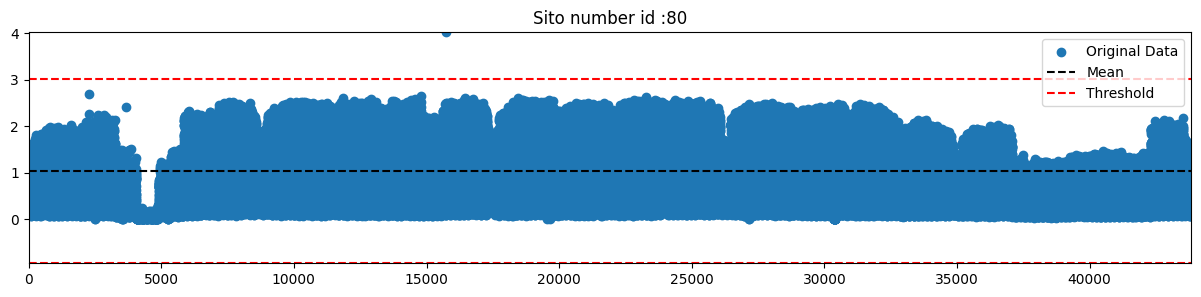

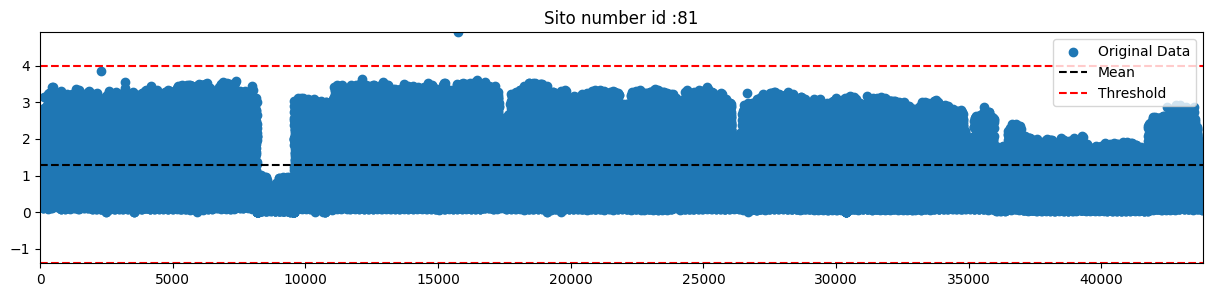

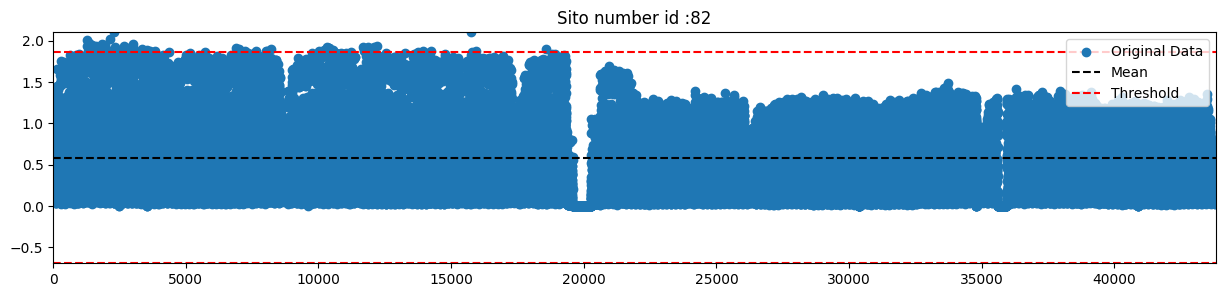

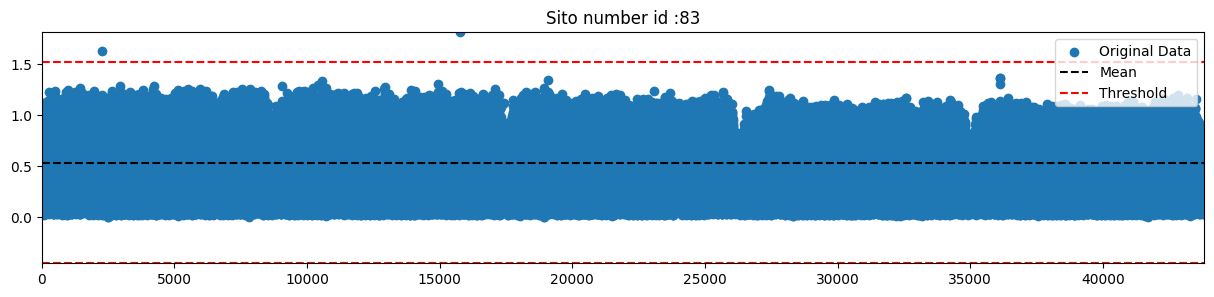

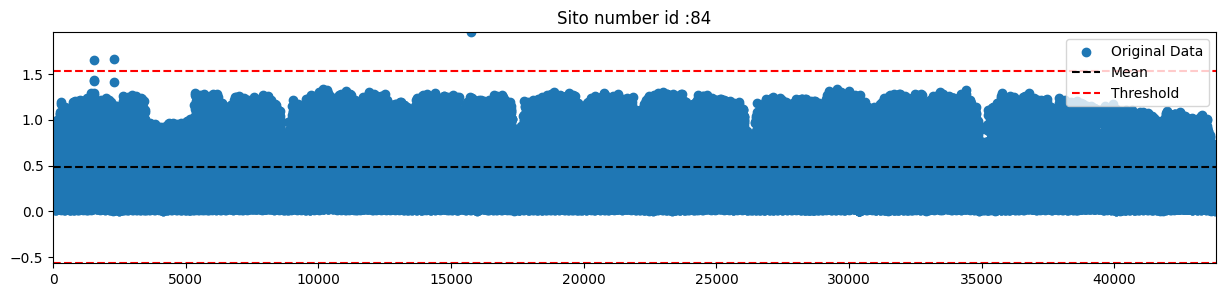

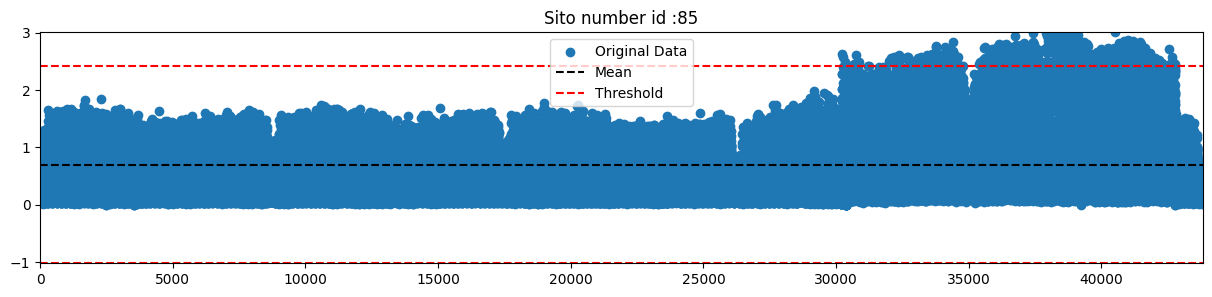

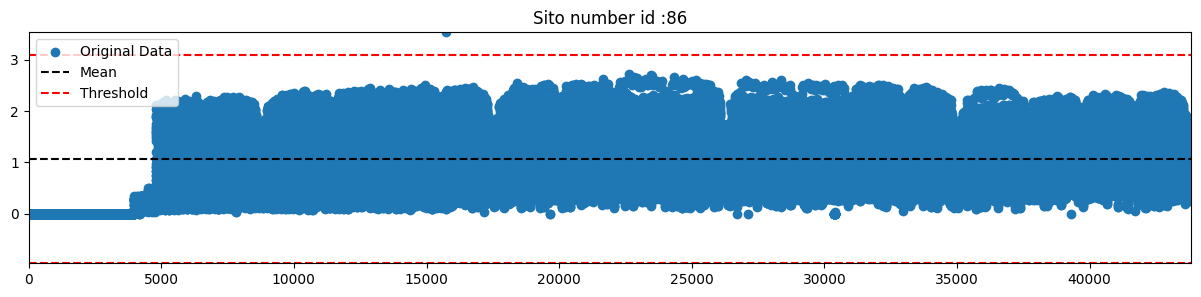

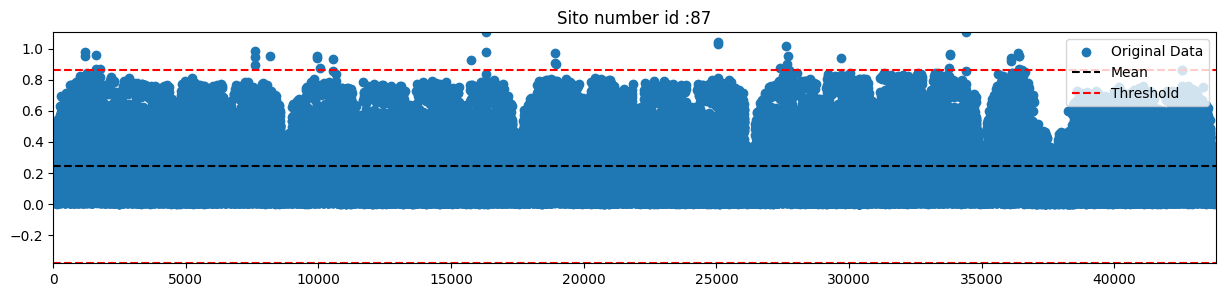

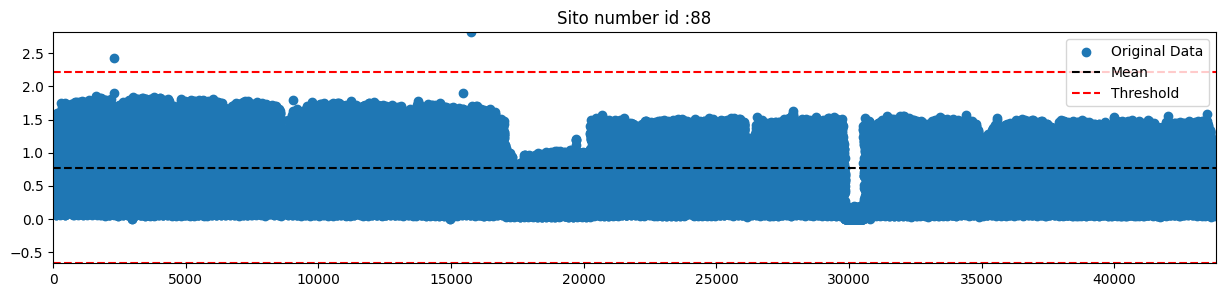

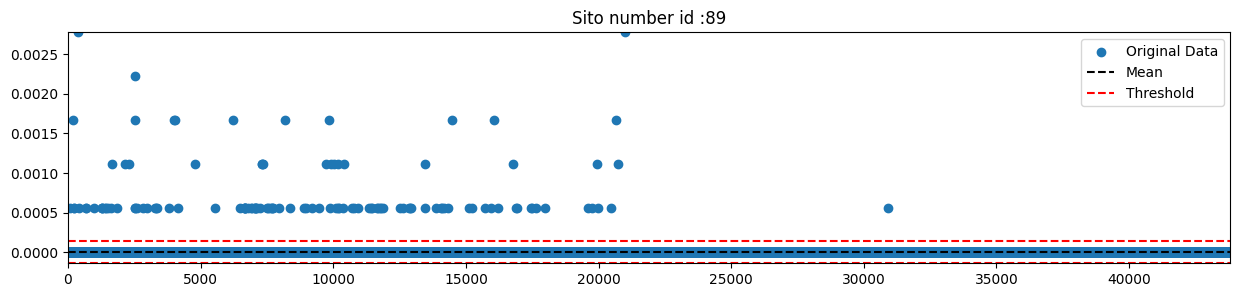

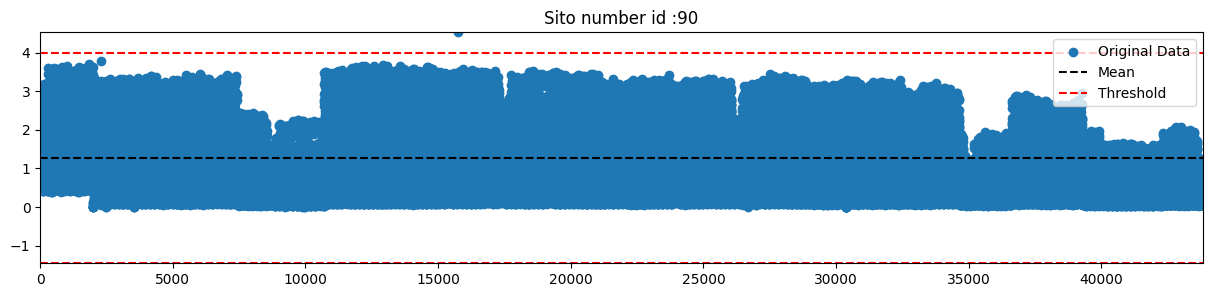

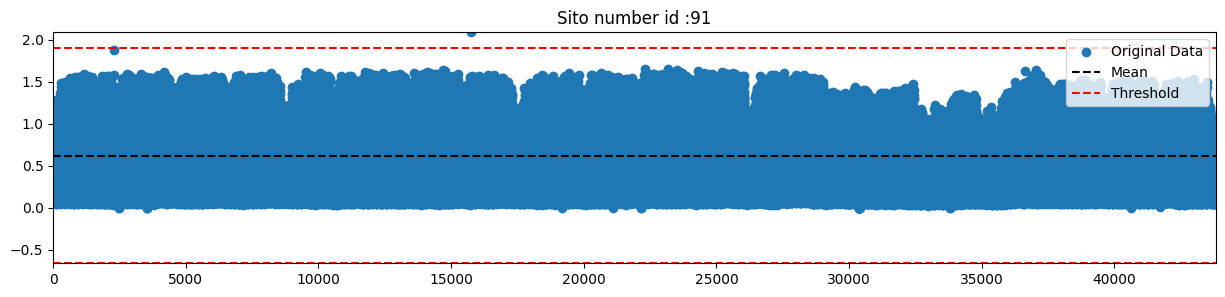

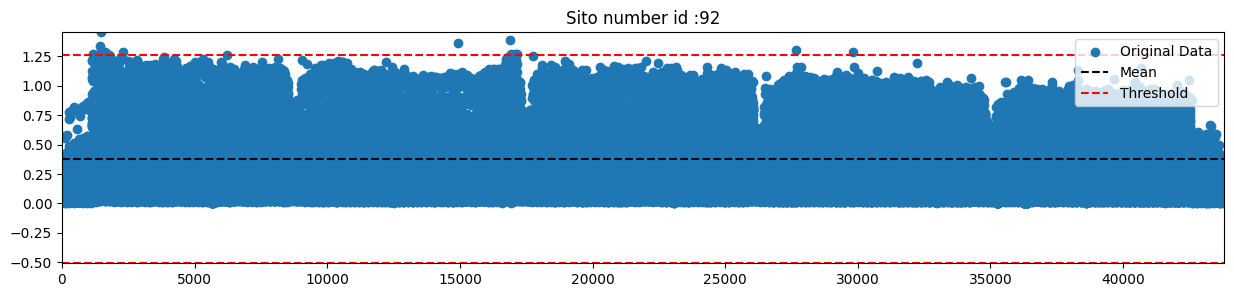

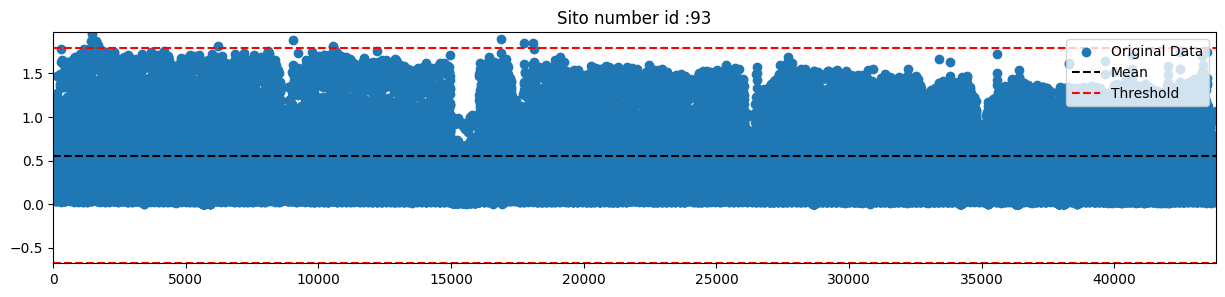

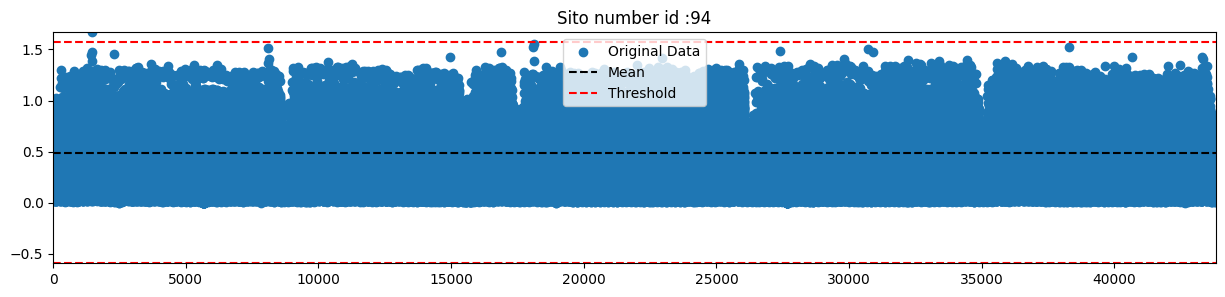

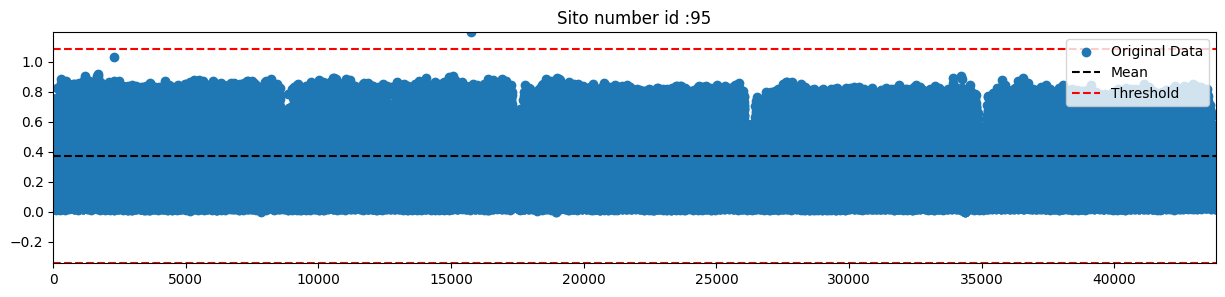

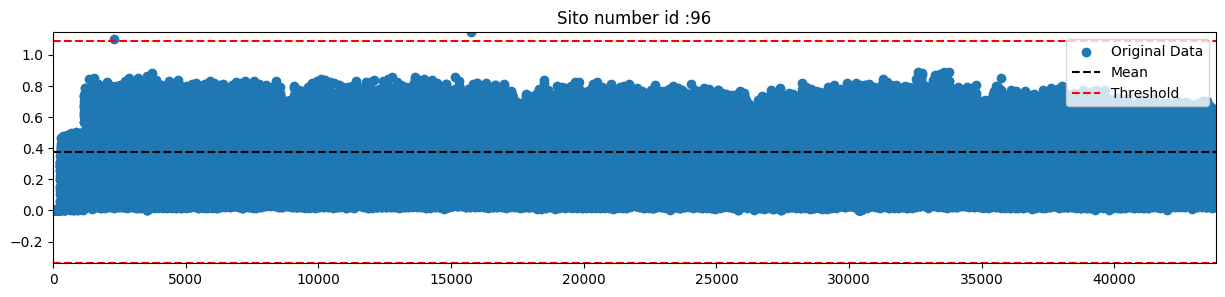

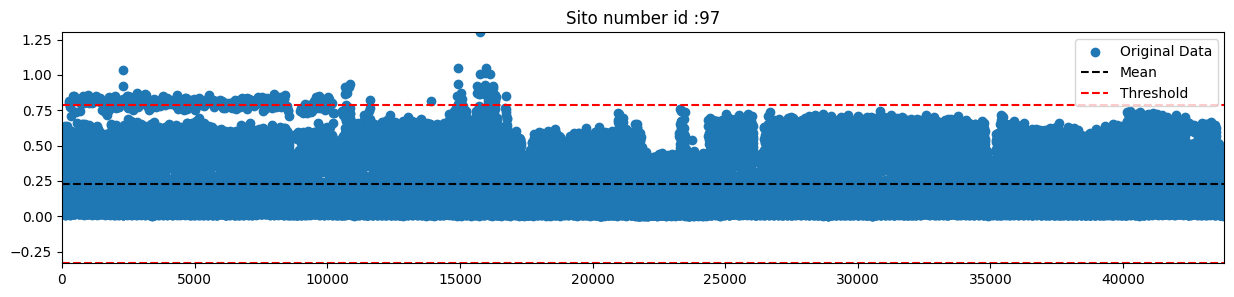

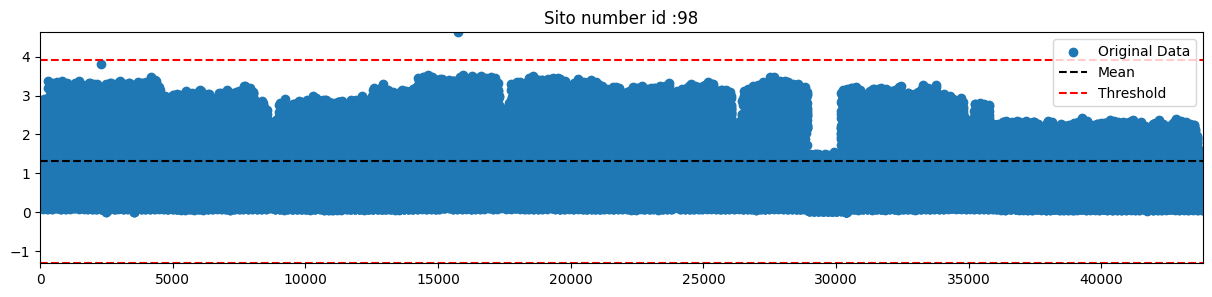

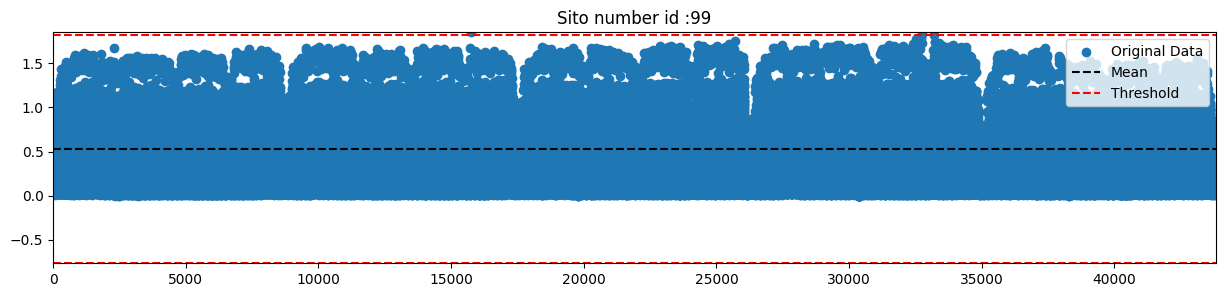

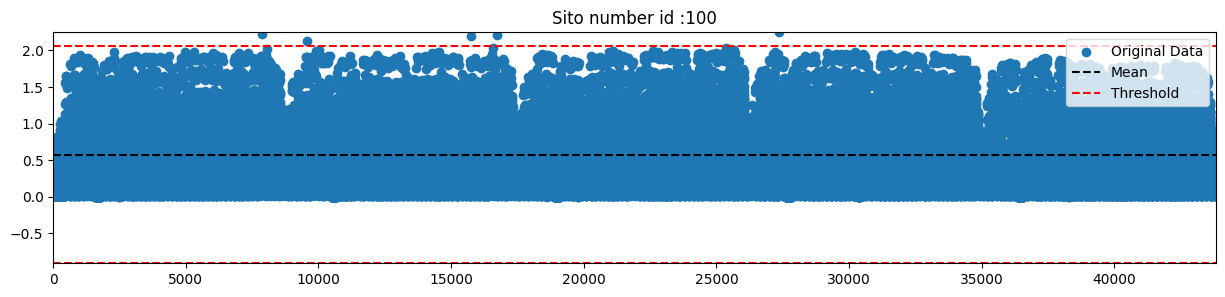

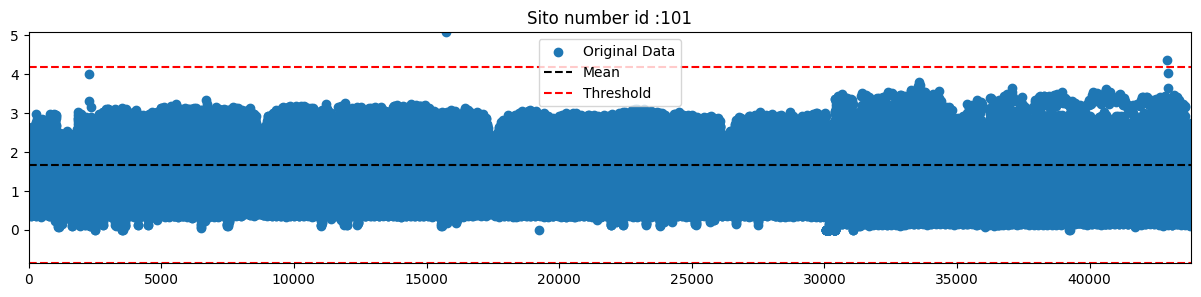

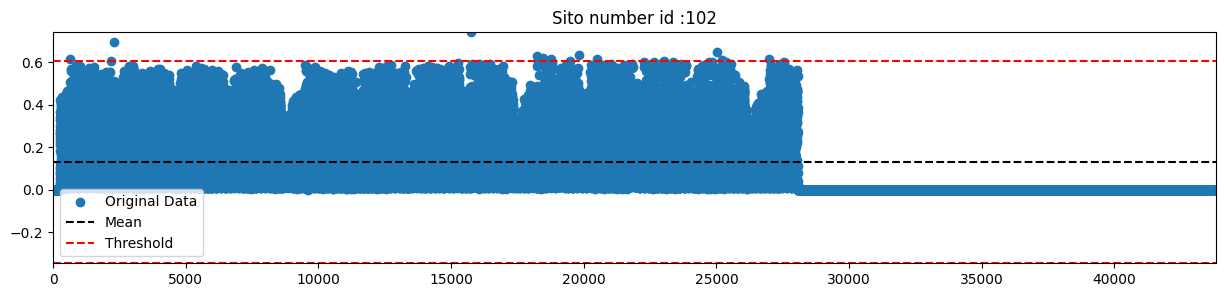

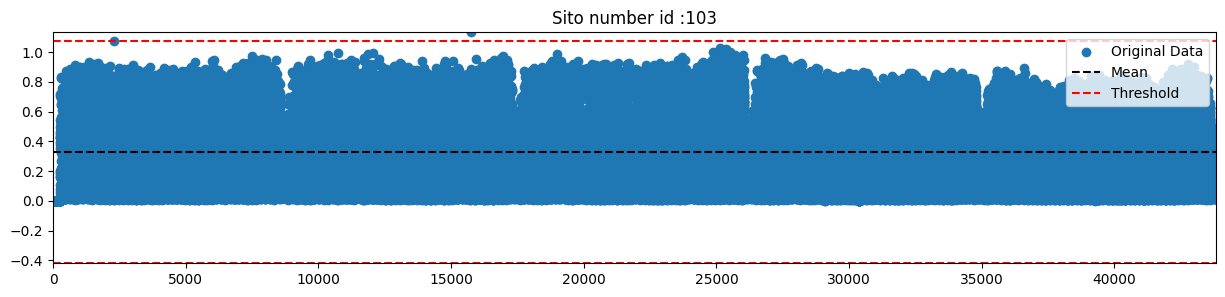

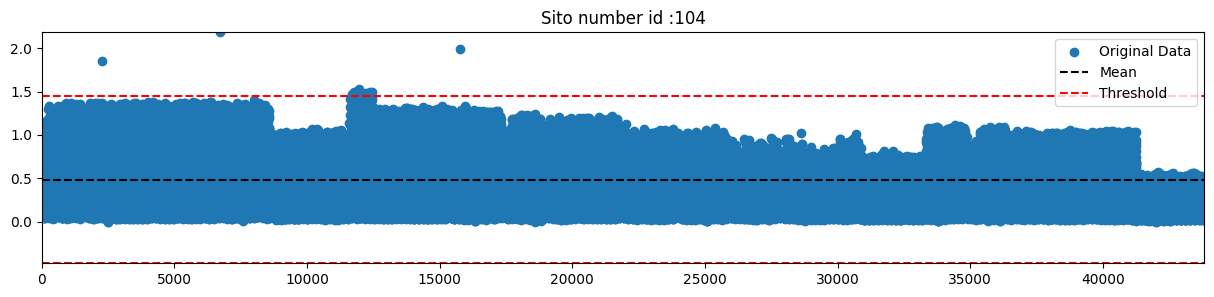

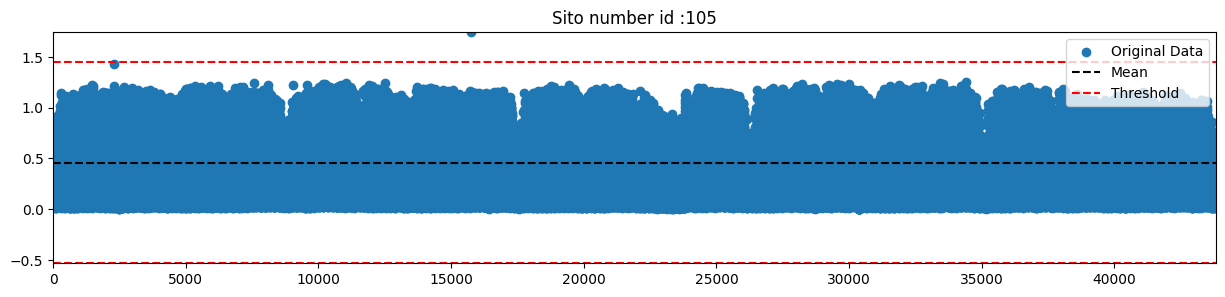

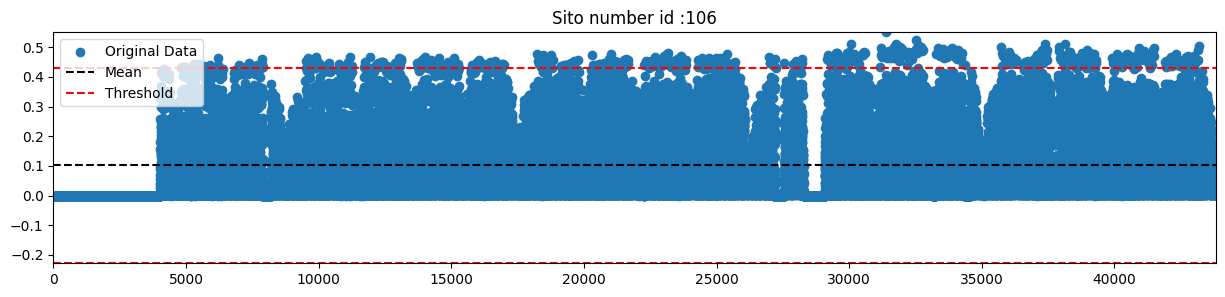

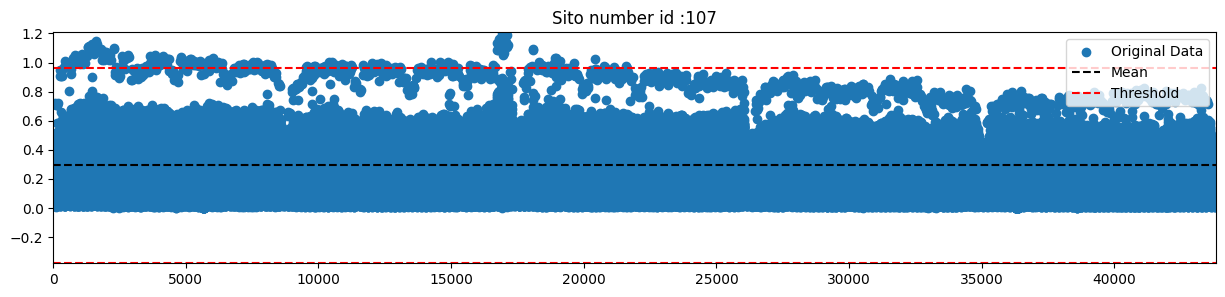

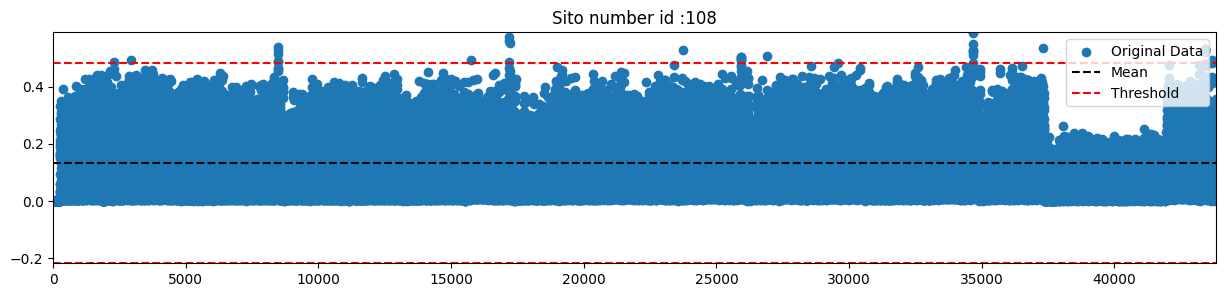

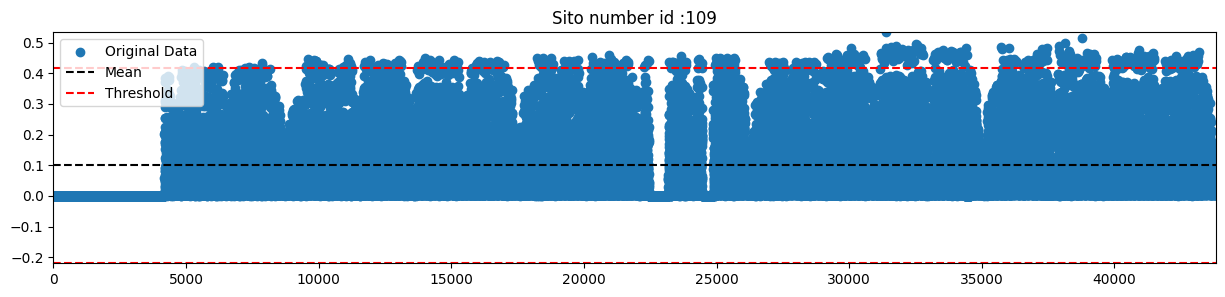

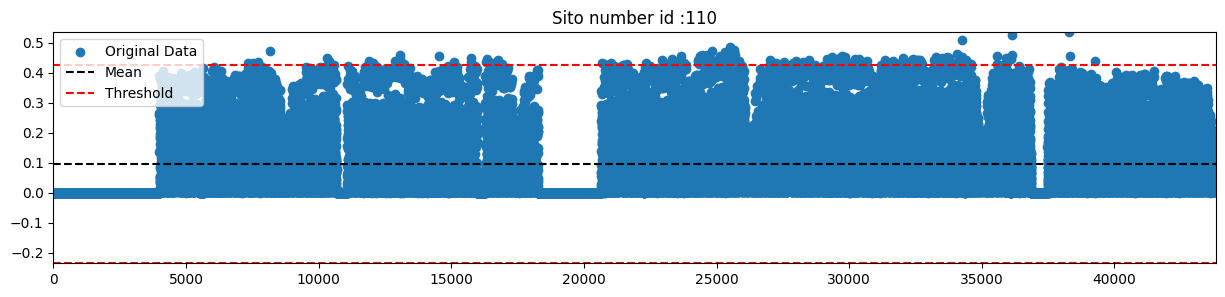

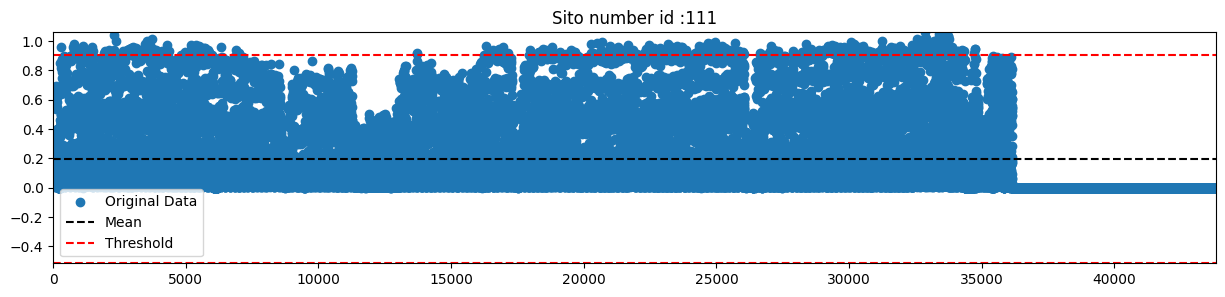

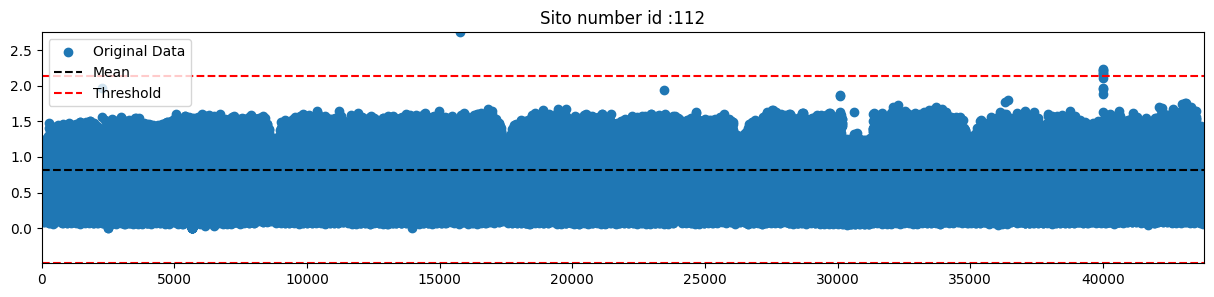

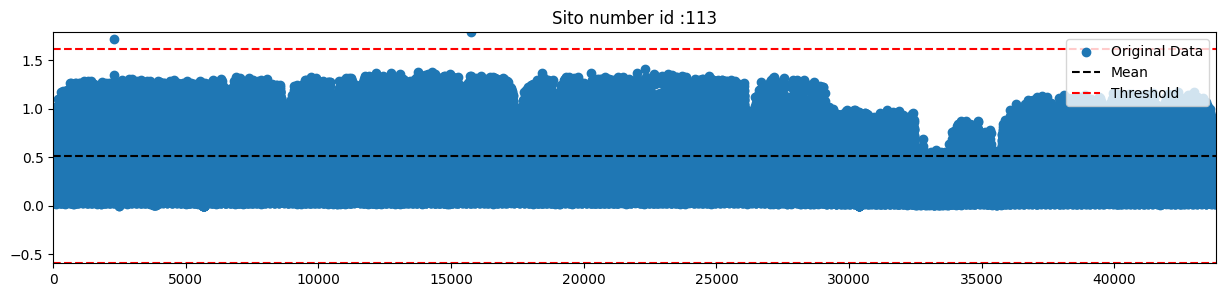

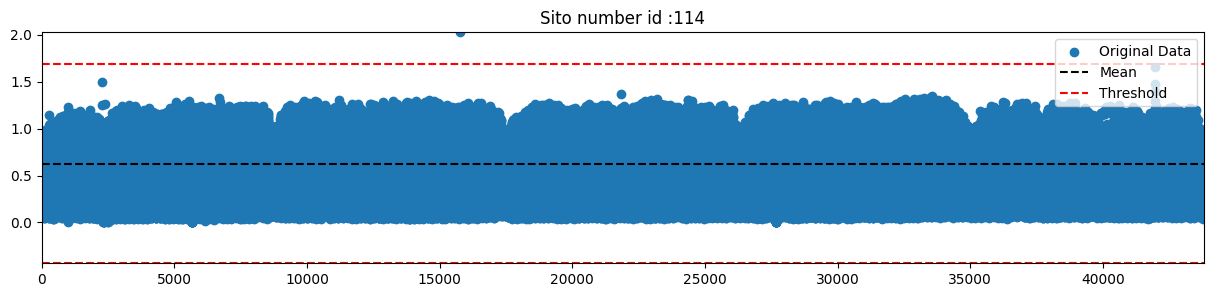

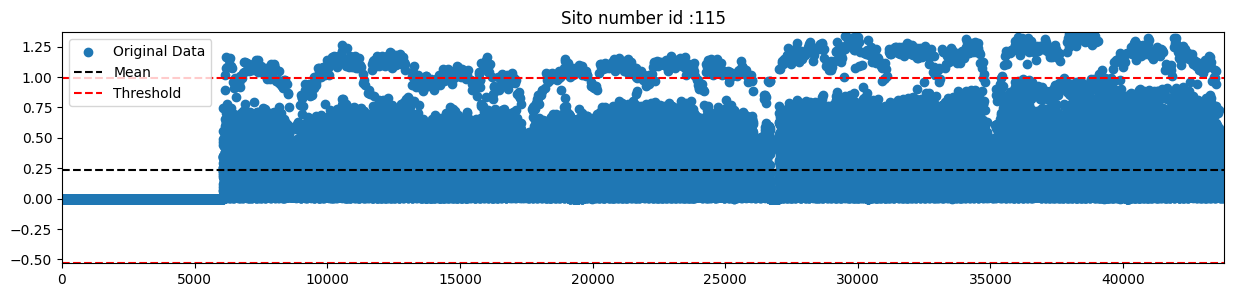

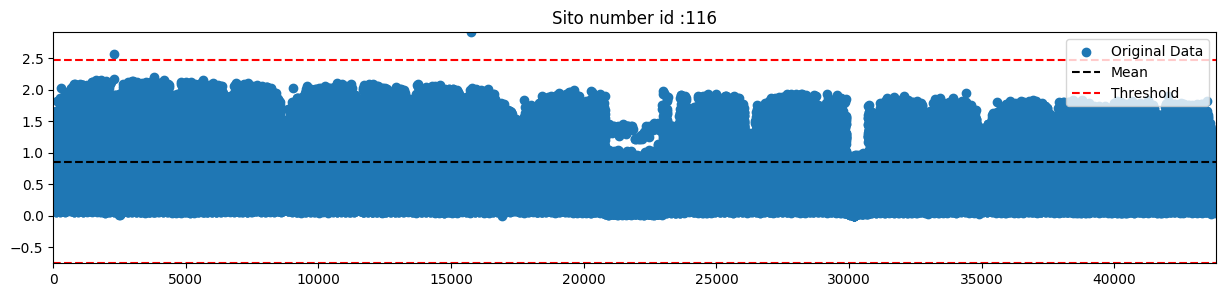

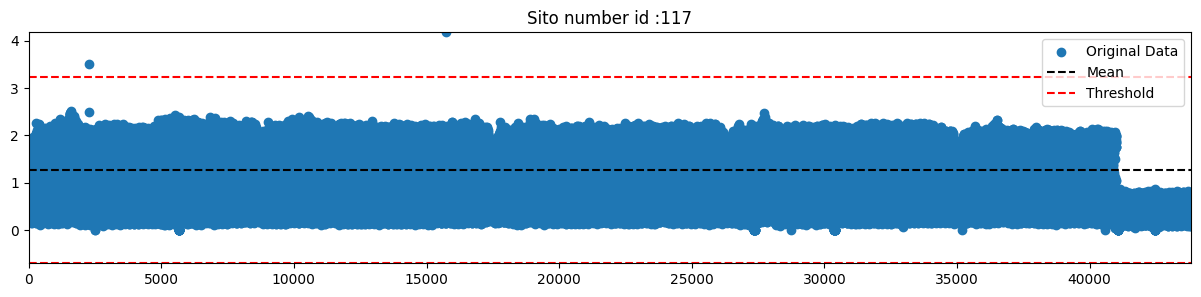

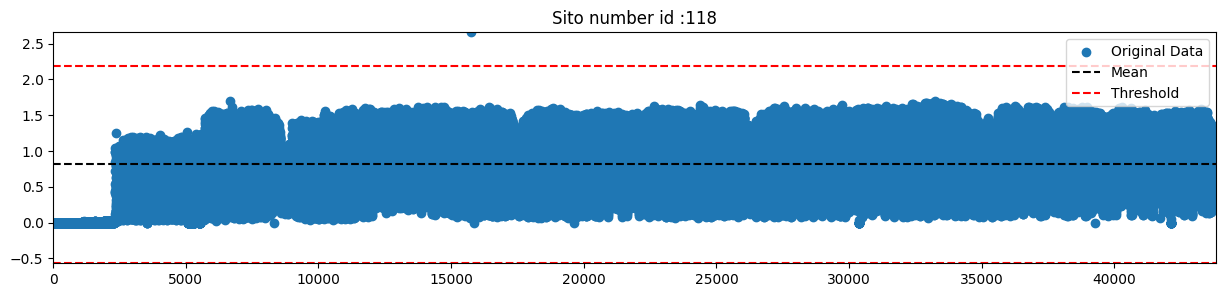

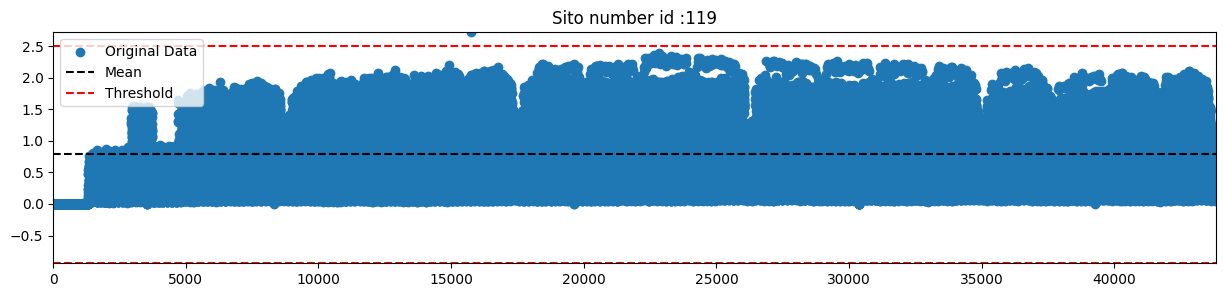

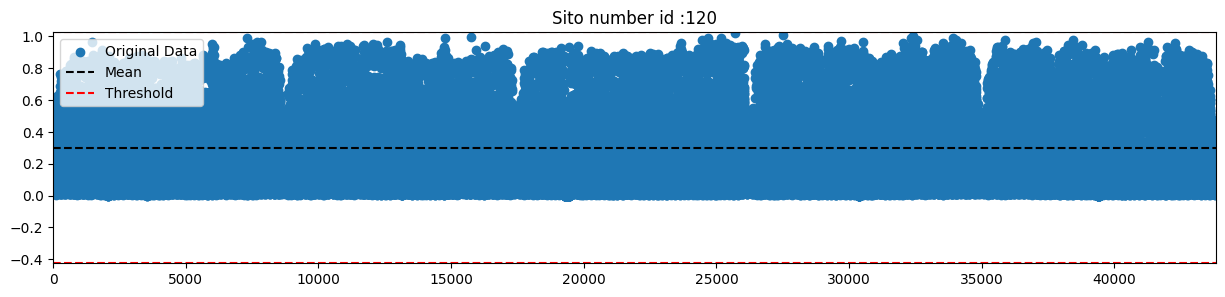

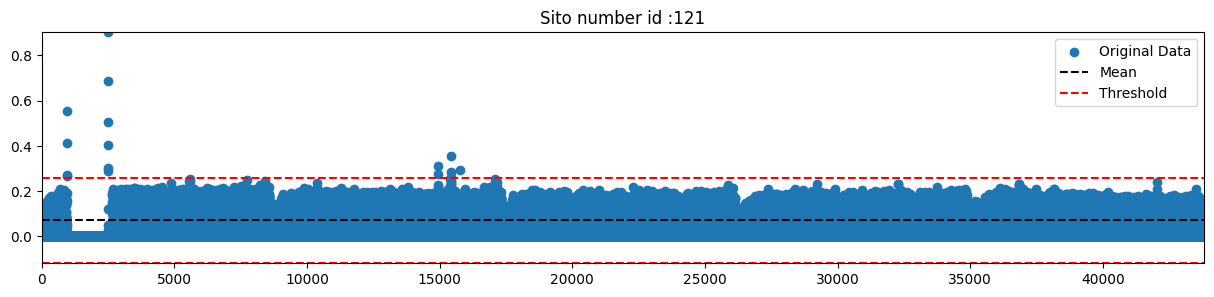

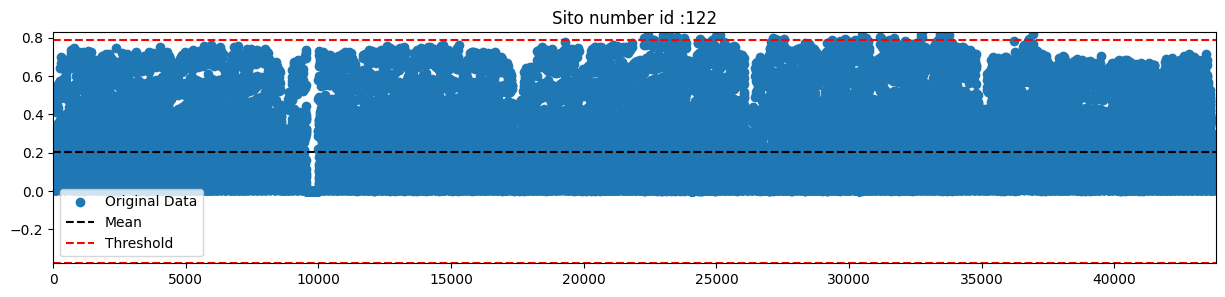